In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Clustering/data')

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')


In [ ]:
!pip install scikit-learn-extra
!pip install umap-learn
# !pip install hdbscan
!pip install git+https://github.com/scikit-learn-contrib/hdbscan.git
!pip install tslearn
!pip install geopandas
!pip install pywavelets
!pip install -q ipywidgets
!pip3 install ipympl
%load_ext autoreload
%autoreload 2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=adc4d630f36500df13b5c131d20b7b599a484df4f70e84b297bd9c5232aca6d1
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=d80df2a2fcf294c18e8af415f984c7b7ed7943a7ae30e39ebc8ac88ae292f671
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-req-build-cgck2qro
  Running co

In [ ]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import correlate
import plotly.graph_objects as go
import statsmodels.api as sm
from scipy import stats
from scipy.stats import iqr
from itertools import combinations
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.manifold import TSNE
from umap import UMAP
import matplotlib.image as mpimg
import hdbscan
from sklearn.cluster import AgglomerativeClustering
from tslearn.metrics import dtw,lcss
import plotly.graph_objects as go
import plotly.express as px
from tslearn.clustering import TimeSeriesKMeans
#from tslearn.clustering import silhouette_score
from sklearn.metrics import silhouette_samples,silhouette_score
import geopandas as gpd
import time
from collections import Counter
import math
from sklearn.manifold import Isomap
import pywt
import pywt.data
import plotly.subplots as sp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from matplotlib.pyplot import get_cmap
from matplotlib.pyplot import cm
from scipy.spatial import distance
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from scipy.signal import find_peaks
from statsmodels.tsa.stattools import acf,pacf

%matplotlib inline
#%matplotlib notebook
"""
extract features and cluster feature vectors from all stations.
use closest actual station to centroid to be the representative station.
Only analyze the representative stations and NOT all.
This is a dimensionality reduction technique.

"""

'\nextract features and cluster feature vectors from all stations.\nuse closest actual station to centroid to be the representative station.\nOnly analyze the representative stations and NOT all.\nThis is a dimensionality reduction technique.\n\n'

In [ ]:
"""
Visualize demand on a map
"""

# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
# s=housing["population"]/100, label="population", figsize=(10,7),
# c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
# )
# plt.legend()

#TODO: AIDITI

'\nVisualize demand on a map\n'

In [ ]:
"""
Extract the station-level inflow and outflow data

"""

# unmet outflow
"""
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\station_level\outflow_data')
"""
"""colab"""
os.chdir('/content/drive/MyDrive/Clustering/data')

station_unmet_60min_outflow_df = pd.read_parquet("UnmetDemand_df_station_level.parquet")


# met outflow
"""
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\station_level\outflow_data')
"""
station_met_outflow_10min_df = pd.read_csv("station_outflow_10_0.01_('2021-09-24', 0)_to_('2021-12-23', 114).csv")
station_met_outflow_60min_df = pd.read_csv("station_outflow_60_0.01_('2021-09-24', 0)_to_('2021-12-23', 19).csv")
station_met_outflow_60min_df.index = station_unmet_60min_outflow_df.index
station_met_outflow_60min_df.insert(0, 'hour',station_met_outflow_60min_df.index.strftime('%H') )
station_met_outflow_60min_df.insert(0, 'weekday',station_met_outflow_60min_df.index.strftime('%A') )
station_met_outflow_60min_df.insert(0, 'week',station_met_outflow_60min_df.index.strftime('%W') )
## multiindexing
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#Using Categorical() function to set the order according to how it is arranged above
station_met_outflow_60min_df["weekday"] = pd.Categorical(station_met_outflow_60min_df.weekday, categories=days, ordered=True)


# total outflow


# inflow
"""
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\station_level\inflow_data')
"""
station_inflow_10min_df = pd.read_csv("station_inflow_10_0.01_('2021-09-24', 0)_to_('2021-12-23', 114).csv")
station_inflow_60min_df = pd.read_csv("station_inflow_60_0.01_('2021-09-24', 0)_to_('2021-12-23', 19).csv")

In [ ]:
"""
                                            Dimensionality Reduction along time axis from 9 weeks to 1 week by seasonality.

"""

"""
####### station unmet demand ########
Dim_Red_stn_unmet_60min_outflow_df = station_unmet_60min_outflow_df.copy()
Dim_Red_stn_unmet_60min_outflow_df.insert(0, 'datetime',Dim_Red_stn_unmet_60min_outflow_df.index )
Dim_Red_stn_unmet_60min_outflow_df = Dim_Red_stn_unmet_60min_outflow_df.reset_index(drop=True)
Dim_Red_stn_unmet_60min_outflow_df

#Dim_Red_stn_unmet_60min_outflow_df['datetime'] = Dim_Red_stn_unmet_60min_outflow_df['datetime'].apply( lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S") )

Dim_Red_stn_unmet_60min_outflow_df.insert(1, 'weekday',Dim_Red_stn_unmet_60min_outflow_df['datetime'].dt.strftime('%A') )
Dim_Red_stn_unmet_60min_outflow_df.insert(1, 'hour',Dim_Red_stn_unmet_60min_outflow_df['datetime'].dt.strftime('%H') )

#You first create your list in the order you want it
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#Using Categorical() function to set the order according to how it is arranged above
Dim_Red_stn_unmet_60min_outflow_df["weekday"] = pd.Categorical(Dim_Red_stn_unmet_60min_outflow_df.weekday, categories=days, ordered=True)
#Dim_Red_stn_unmet_60min_outflow_df.drop(columns=['datetime'],inplace=True)
Dim_Red_stn_unmet_60min_outflow_week_df = Dim_Red_stn_unmet_60min_outflow_df.groupby ( by=["weekday","hour"] ).agg([np.mean])

Dim_Red_stn_unmet_60min_outflow_week_df.drop(columns=['datetime'],inplace=True)
# fig, ax = plt.subplots(figsize=(35,50))         # Sample figsize in inches
# ax.set_title('Weekday-hour mean Groupby TOTAL outflow/demand')
# sns.heatmap(Dim_Red_stn_unmet_60min_outflow_week_df, annot=True,linewidths=.5, ax=ax)
####### station unmet demand ########
"""


####### station met demand ########

Dim_Red_stn_met_60min_outflow_week_df = station_met_outflow_60min_df.drop(columns=['week']).groupby ( by=["weekday","hour"] ).agg([np.mean])

# fig, ax = plt.subplots(figsize=(35,50))         # Sample figsize in inches
# ax.set_title('Weekday-hour mean Groupby TOTAL outflow/demand')
# sns.heatmap(Dim_Red_stn_met_60min_outflow_week_df, annot=True,linewidths=.5, ax=ax)
####### station met demand ########



In [ ]:
## staiton to gps map to visualize clusters of staitons on map

stations_df = pd.read_csv('stations.csv')
stations_df

station_to_gps_dict = {}

for r in range(len(stations_df)):
    stn = stations_df.loc[r,'ID']
    lat = stations_df.loc[r,'x']
    long = stations_df.loc[r,'y']
    station_to_gps_dict[stn] = (lat,long)


#station_to_gps_dict

station_to_index_dict = {}

for r in range(len(stations_df)):
    stn = stations_df.loc[r,'ID']
    lat = stations_df.loc[r,'x']
    long = stations_df.loc[r,'y']
    station_to_gps_dict[stn] = (lat,long)


In [ ]:
# def feature_standardization(X_train):
#     # ensure that features of different scale are comparable using euclidean distance
#     X_train_Df = pd.DataFrame(X_train)
#     X_train_normalized =(X_train_Df-X_train_Df.mean())/X_train_Df.std()
#     X_train_normalized = X_train_normalized.fillna(0)
#     return X_train_normalized.to_numpy()

class feat_transformation():
    def __init__(self,):
        return
    def feature_normalization(self,X_train):
        # ensure that features of different scale are comparable using euclidean distance
        self.scaler = MinMaxScaler() #StandardScaler()
        self.scaler.fit(X_train)
        X_train_normalized = self.scaler.transform(X_train)
        return X_train_normalized

    def inv_feature_normalization(self,X_train_normalized):
        # ensure that features of different scale are comparable using euclidean distance
        X_train = self.scaler.inverse_transform(X_train_normalized)
        return X_train


In [ ]:
## Visualize the clustered time series


def plot_stations_of_clusters(labels, df,TS_type,X_train,plot_type,angular_labels,plot_title,mother_wavelet,limit_level):
    unique_clusters = np.unique(labels)
    num_clusters = len(unique_clusters)
    cluster_to_stations_dict = { l: [] for l in unique_clusters}

    cols = df.columns
    station_to_index_dict = {}
    index=0
    if isinstance(cols[index], tuple): # differentiate between Dim_Red_unmet_60min_outflow_week_df DF and unmet_60min_outflow_df DF
      for stn in cols: # station to index mapping
        station_to_index_dict[stn[0]] = index
        index+=1
    else:
      for stn in cols: # station to index mapping
        station_to_index_dict[stn] = index
        index+=1

    idx=0
    if isinstance(cols[idx], tuple): # differentiate between Dim_Red_unmet_60min_outflow_week_df DF and unmet_60min_outflow_df DF
      for l in labels:
        cluster_to_stations_dict[l].append(cols[idx][0])
        idx+=1
    else:
      for l in labels:
        cluster_to_stations_dict[l].append(cols[idx])
        idx+=1

    shapefile_data = gpd.read_file('sgp_map/SGP_ADM1.shp',)

    num_features = X_train.shape[1]
    all_cluster_feat_mins = np.array([])
    all_cluster_feat_maxs = np.array([])

    ################## par coords plot ##################
    if(plot_type == 'par_coords'): # parallel coordinates
        for key in cluster_to_stations_dict.keys():
          #plt.figure(figsize=(10,10))
          fig0, ax = plt.subplots()
          shapefile_data.plot(ax=ax,edgecolor='black', linewidth=0.9, color='lightblue',figsize=(5,5))

          #fig = go.Figure()
          #fig1 = go.Figure()
          fig2, ax2 = plt.subplots(figsize=(30,5))
          fig3, ax3 = plt.subplots(figsize=(60,5))
          fig4, ax4 = plt.subplots(figsize=(30,5))

          color_feature = 0  # The feature index to use for colors
          color_map = get_cmap('tab20')  # Choose a colormap

          d = {}

          feat_min_per_cluster = [1000]*num_features
          feat_max_per_cluster = [-1000]*num_features

          for station in cluster_to_stations_dict[key]:
            ax.scatter(station_to_gps_dict[int(station)][0], station_to_gps_dict[int(station)][1], color='red', marker='.')

            y_arr = np.array(df[station].values).reshape(-1)
            # fig = fig.add_trace(go.Scatter(x=np.arange(len(y_arr)), y=y_arr,mode='lines+markers',name=station))
            # fig.update_layout(title='cluster: '+ str(key),xaxis_title="time (Monday 0:00 - Sunday 23:00)",
            # yaxis_title=TS_type,autosize=False,width=1800,height=400, )

            wave_coeffs = pywt.wavedec( unmet_60min_outflow_df[station] , mother_wavelet, level=limit_level)
            rec_wave = pywt.waverec(wave_coeffs, mother_wavelet)
            ym = np.median(rec_wave)
            ax3.plot(np.linspace(0, 1., num=len(rec_wave)), rec_wave-ym)
            #ax3.plot(unmet_60min_outflow_df[station])

            d['r'] = X_train[station_to_index_dict[station]]
            # d['theta'] = angular_labels
            # fig1.add_trace(go.Scatterpolar(
            #     r=d['r'],
            #     theta=d['theta'],
            #     fill='toself',name=station,
            # ))

            sample = X_train[station_to_index_dict[station]]  # Get the current sample
            color = color_map(sample[color_feature])  # Get the color based on the color feature value
            ax2.plot(range(num_features), sample, color=color, alpha=0.7, label=station)

            sns.histplot(data=unmet_60min_outflow_df[station], kde=False, stat="count",binwidth=1, ax=ax4)
            ax5 = ax4.twinx()
            sns.kdeplot(data=unmet_60min_outflow_df[station], ax=ax5)

            for f in range(num_features):
                feat_min_per_cluster[f] = min(feat_min_per_cluster[f],sample[f])
                feat_max_per_cluster[f] = max(feat_max_per_cluster[f],sample[f])

          all_cluster_feat_mins = np.append(all_cluster_feat_mins,np.array(feat_min_per_cluster))
          all_cluster_feat_maxs = np.append(all_cluster_feat_maxs,np.array(feat_max_per_cluster))

          # fig1.update_layout(title='cluster: '+ str(key),
          #     polar=dict(
          #         radialaxis=dict(visible=True,))#range=[-2, 7]))
          #     ,height=800,width=800,
          #     showlegend=True
          # )

          ax.set_xlabel('Longitude')
          ax.set_ylabel('Latitude')
          ax.set_title('Singapore Stations of cluster: '+ str(key))
          fig0.show()
          #fig.show()
          #fig1.show()

          ax2.set_xticks(range(num_features))
          ax2.set_xticklabels([i for i in angular_labels])
          ax2.set_ylabel('Normalized Value')
          # Adjust the y-axis limits based on your data range
          #ax2.set_ylim(0, 1)  # Modify as needed
          ax2.set_title(plot_title+', cluster: '+str(key)+' has '+str(len(cluster_to_stations_dict[key]))+' stations')
          #ax2.legend()
          ax2.grid(True, linestyle='--')
          #fig2.tight_layout()
          fig2.show()

          #ax3.set_xticklabels([i for i in unmet_60min_outflow_df.index])
          plt.xticks(rotation=90)
          ax3.set_ylabel('Low frequency, '+'level: '+ str(limit_level) + ', '+ mother_wavelet +' Wavelet reconstruction')
          #ax3.set_ylim(0, 1)  # Modify as needed
          ax3.set_title(plot_title+', cluster: '+str(key)+' has '+str(len(cluster_to_stations_dict[key]))+' stations')
          #ax3.legend()
          ax3.grid(True, linestyle='--')
          #fig3.tight_layout()
          fig3.show()

          ax4.set_xlabel('Demand value')
          ax4.set_ylabel('Density/Frequency')
          ax4.set_title('station''s Kernel Density Plots of cluster: '+str(key))
          ax4.legend()
          fig4.show()
          print('Number of stations in cluster '+ str(key)+' : ', len(cluster_to_stations_dict[key]))
          print('Stations in cluster: ',cluster_to_stations_dict[key])
    ################## par coords plot ##################

    ################## polar plot ##################

    elif(plot_type == 'polar'):
        angular_labels = [ str(l) for l in range( X_train.shape[1] )]
        for key in cluster_to_stations_dict.keys():
          fig0, ax = plt.subplots(figsize=(10,5))
          shapefile_data.plot(ax=ax,edgecolor='black', linewidth=0.9, color='lightblue',figsize=(5,5))

          #fig = go.Figure()
          fig1 = go.Figure()

          d = {}

          feat_min_per_cluster = [1000]*num_features
          feat_max_per_cluster = [-1000]*num_features

          for station in cluster_to_stations_dict[key]:
            ax.scatter(station_to_gps_dict[int(station)][0], station_to_gps_dict[int(station)][1], color='red', marker='.')

            y_arr = np.array(df[station].values).reshape(-1)
            # fig = fig.add_trace(go.Scatter(x=np.arange(len(y_arr)), y=y_arr,mode='lines+markers',name=station))
            # fig.update_layout(title='cluster: '+ str(key),xaxis_title="time (Monday 0:00 - Sunday 23:00)",
            # yaxis_title=TS_type,autosize=False,width=1800,height=400, )

            d['r'] = X_train[station_to_index_dict[station]]
            d['theta'] = angular_labels
            fig1.add_trace(go.Scatterpolar(
                r=d['r'],
                theta=d['theta'],
                fill='toself',name=station,
            ))

            sample = X_train[station_to_index_dict[station]]  # Get the current sample
            for f in range(num_features):
                feat_min_per_cluster[f] = min(feat_min_per_cluster[f],sample[f])
                feat_max_per_cluster[f] = max(feat_max_per_cluster[f],sample[f])

          all_cluster_feat_mins = np.append(all_cluster_feat_mins,np.array(feat_min_per_cluster))
          all_cluster_feat_maxs = np.append(all_cluster_feat_maxs,np.array(feat_max_per_cluster))

          fig1.update_layout(title='cluster: '+ str(key),
              polar=dict(
                  radialaxis=dict(visible=True,))#range=[-2, 7]))
              ,height=1000,width=1000,
              showlegend=True
          )

          ax.set_xlabel('Longitude')
          ax.set_ylabel('Latitude')
          ax.set_title('Singapore Stations of cluster '+ str(key))
          fig0.show()
          #fig.show()
          fig1.show()
          print('Number of stations in cluster '+ str(key)+' : ', len(cluster_to_stations_dict[key]))
          print('Stations in cluster: ',cluster_to_stations_dict[key])
    ################## polar plot ##################
    else:
        raise ValueError('only par_coords or are polar allowed')

    all_cluster_feat_mins = np.hstack(all_cluster_feat_mins)
    all_cluster_feat_maxs = np.hstack(all_cluster_feat_maxs)
    return all_cluster_feat_mins,all_cluster_feat_maxs

#plot_stations_of_clusters(km.labels_, Dim_Red_unmet_60min_outflow_week_df,'outflow')

def plot_silhouette_scores(X_train,labels,metric,linkage):
    unique_clusters = np.unique(labels)
    num_clusters = len(unique_clusters)
    sample_silhouette_values = silhouette_samples(X=X_train, labels=labels,metric=metric)
    silhouette_avg = silhouette_score(X=X_train, labels=labels,metric=metric)
    fig, ax1 = plt.subplots()
    y_lower = 10

    for i in range(num_clusters): # exclude the
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("metric: "+metric+", linkage: "+linkage+", silhouette_avg: "+str(silhouette_avg)+", num_clusters: "+str(num_clusters))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    return


def plot_cluster_representatives(X_train,all_cluster_feat_mins,all_cluster_feat_maxs,plot_type,angular_labels):
    num_features = X_train.shape[1]
    low_list =  all_cluster_feat_mins[num_features:] ## remove outlier cluster
    high_list = all_cluster_feat_maxs[num_features:] ## remove outlier cluster
    num_clusters = int(len(all_cluster_feat_mins[num_features:] )/num_features) ## remove outlier cluster
    color = cm.rainbow(np.linspace(0, 1, num_clusters))

    low = {}
    high = {}
    c = 0
    idx=0
    low[0] = []
    high[0] = []
    for l,h in zip(low_list,high_list):
        low[c].append(l)
        high[c].append(h)
        idx+=1
        if idx%num_features==0:
            c+=1
            low[c] = []
            high[c] = []


    if(plot_type == 'par_coords'): # parallel coordinates
        plt.close('all')

        #fig,ax = plt.subplots(figsize=(20,7))

        cluster_rep_arr = np.empty((num_clusters,num_features))
        adj=0
        for c in range(num_clusters):
            for f in range(num_features):
              cluster_rep_arr[c,f] = np.average([low[c][f],high[c][f]])
              #ax.plot([f+adj]*2,[low[c][f],high[c][f]],c=color[c],marker='*',label=str(c))
            adj += 0.05

        # ax.set_xticks(range(num_features))
        # ax.set_xticklabels([i for i in angular_labels])
        # ax.set_title('Representative points from each cluster for '+str(num_clusters) + ' clusters '+ 'excluding outlier cluster')
        # ax.set_xlabel('TS stats features')
        # ax.set_ylabel('Normalized value')
        # ax.grid(True, linestyle='--')
        # ax.legend()
        # fig.show()


        # Convert the array and labels to a DataFrame
        df = pd.DataFrame(cluster_rep_arr, columns=angular_labels)
        df['sample'] = range(len(df))
        # Create parallel coordinates figure using Plotly Express
        fig2 = px.parallel_coordinates(df,color='sample',color_continuous_scale="picnic",dimensions=df.columns[:-1],)
        # Display the plot
        fig2.update_layout(
            plot_bgcolor='black',  # Set the background color to black
            paper_bgcolor='black',  # Set the plot area background color to black
            font_color='white'  # Set the font color to white for better visibility
        )
        fig2.show()


    elif(plot_type == 'polar'): # polar plot
        plt.close('all')
        angular_labels = [ str(l) for l in range( X_train.shape[1] )]

        cmap = cm.get_cmap('tab20c')
        colors = [mcolors.rgb2hex(cmap(i)[:3]) for i in range(num_clusters)]

        d = {}
        fig1 = go.Figure()

        for c in range(num_clusters):
            color = colors[c % num_clusters]
            d['r'] = low[c]
            d['theta'] = angular_labels
            fig1.add_trace(go.Scatterpolar(
                r=d['r'],
                theta=d['theta'],
                fill='toself',name=str(c)+'_low',
                line=dict(color=color),
            ))
            d['r'] = high[c]
            d['theta'] = angular_labels
            fig1.add_trace(go.Scatterpolar(
                r=d['r'],
                theta=d['theta'],
                fill='toself',name=str(c)+'_high',
                line=dict(color=color),
            ))

        fig1.update_layout(title='Representative DWT points from each cluster. (excluding outlier cluster)',
            polar=dict(
                radialaxis=dict(visible=True,))#range=[-2, 7]))
            ,height=1000,width=1000,
            showlegend=True
        )
        fig1.show()
    return





In [ ]:

def compute_mahalanobis_dist_mat(X):
    # Calculate the covariance matrix
    cov_matrix = np.cov(X.T)
    reg_param = 0.01  # Regularization parameter
    # Calculate the inverse of the covariance matrix
    inv_cov_matrix = np.linalg.inv(cov_matrix + reg_param * np.eye(cov_matrix.shape[0]))
    #inv_cov_matrix = np.linalg.inv(cov_matrix)
    # Calculate the Mahalanobis distance matrix
    mahalanobis_dist_mat = distance.cdist(X, X, metric='mahalanobis', VI=inv_cov_matrix)
    return mahalanobis_dist_mat

In [ ]:
class plot_all():
    def __init__(self,print_msg):
        self.print_msg = print_msg
        return

    def plot_tSNE_2d(self,X_train,print_msg,ax,col):
        ## t-SNE
        plot_kwds = {'alpha' : 0.25, 's' : 10, 'linewidths':0}
        projection = TSNE(n_components=2).fit_transform(X_train)
        ax[col].scatter(*projection.T, **plot_kwds)
        ax[col].set_title('t-SNE, '+ print_msg)
        #plt.show()
        return ax

    def plot_UMAP_2d(self,X_train,print_msg):
        umap_2d = UMAP(n_components=2, init='random', random_state=0)
        proj_2d = umap_2d.fit_transform(X_train)
        fig = go.Scatter(
            x=proj_2d[:, 0],  # X-axis values
            y=proj_2d[:, 1],  # Y-axis values
            mode='markers',
            marker=dict(
                size=5,
                color=np.arange(len(X_train)),  # Color points based on a range of values (e.g., sample index)
                colorscale='Viridis',  # Choose a colorscale
                showscale=True  # Show the colorbar
            ), name=print_msg
        )
        #fig.update_layout(title=print, scene=dict(xaxis_title='Dimension 1', yaxis_title='Dimension 2', zaxis_title='Dimension 3'))
        return fig


    def plot_UMAP_3d(self,X_train,n_neighbors,min_dist,metric):
        umap_3d = UMAP(n_components=3,n_neighbors=n_neighbors,min_dist=min_dist,metric=metric, init='random', random_state=0)
        proj_3d = umap_3d.fit_transform(X_train)
        fig = go.Scatter3d(
            x=proj_3d[:, 0],  # X-axis values from the low-dimensional representation
            y=proj_3d[:, 1],  # Y-axis values from the low-dimensional representation
            z=proj_3d[:, 2],  # Z-axis values from the low-dimensional representation
            mode='markers',
            marker=dict(
                size=5,
                color=np.arange(len(X_train)),  # Color points based on a range of values (e.g., sample index)
                colorscale='Viridis',  # Choose a colorscale
                showscale=True  # Show the colorbar
            ),name=self.print_msg
        )
        #fig.show()
        return fig

    def plot_UMAP_interactive(self,n_neighbors,min_dist,metric):
        umap_3d = UMAP(n_components=3,n_neighbors=n_neighbors,min_dist=min_dist,metric=metric, init='random', random_state=0)
        proj_3d = umap_3d.fit_transform(X_train)
        x=proj_3d[:,0]
        y=proj_3d[:,1]
        z=proj_3d[:,2]
        # Create the figure and subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

        # Plot 1 - 2D Plot
        ax1.scatter(x, y,c=np.arange(len(X_train)))
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_title(self.print_msg)

        # Plot 2 - 3D Plot
        ax2 = fig.add_subplot(122, projection='3d')
        ax2.scatter(x, y, z, c=np.arange(len(X_train)))
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_zlabel('Z')
        ax2.set_title(self.print_msg)

        # Adjust the spacing between subplots
        plt.subplots_adjust(wspace=0.5)

        # Display the plot
        plt.show()
        return


    def plot_ISOMAP_2d(self,X_train,print_msg,n_neighbors=5):
        ## isomap
        # Create an instance of the Isomap class and specify the desired parameters
        n_components = 2  # Number of dimensions in the low-dimensional representation
        # Number of nearest neighbors used in constructing the neighborhood graph
        isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
        # Fit the Isomap model to your data
        isomap_embedding = isomap.fit_transform(X_train)
        # Access the low-dimensional representation
        low_dim_data = isomap_embedding
        fig = go.Scatter(
            x=low_dim_data[:, 0],  # X-axis values
            y=low_dim_data[:, 1],  # Y-axis values
            mode='markers',
            marker=dict(
                size=5,
                color=np.arange(len(X_train)),  # Color points based on a range of values (e.g., sample index)
                colorscale='Viridis',  # Choose a colorscale
                showscale=True  # Show the colorbar
            ), name=print_msg
        )
        #fig.update_layout(title=print, scene=dict(xaxis_title='Dimension 1', yaxis_title='Dimension 2', zaxis_title='Dimension 3'))
        #fig.show()
        return fig

    def plot_ISOMAP_3d(self,X_train,print_msg,n_neighbors=5):
        ## isomap
        # Create an instance of the Isomap class and specify the desired parameters
        n_components = 3  # Number of dimensions in the low-dimensional representation
        n_neighbors = 5  # Number of nearest neighbors used in constructing the neighborhood graph
        isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
        # Fit the Isomap model to your data
        isomap_embedding = isomap.fit_transform(X_train)
        # Access the low-dimensional representation
        low_dim_data = isomap_embedding
        # Create a 3D scatter plot using Plotly
        fig = go.Scatter3d(
            x=low_dim_data[:, 0],  # X-axis values from the low-dimensional representation
            y=low_dim_data[:, 1],  # Y-axis values from the low-dimensional representation
            z=low_dim_data[:, 2],  # Z-axis values from the low-dimensional representation
            mode='markers',
            marker=dict(
                size=5,
                color=np.arange(len(X_train)),  # Color points based on a range of values (e.g., sample index)
                colorscale='Viridis',  # Choose a colorscale
                showscale=True  # Show the colorbar
            ),name=print_msg
        )
        #fig.show()
        return fig

    def plot_hist_n_corr(self,X_train):
        X_train_df = pd.DataFrame(X_train)
        ######### histogram plot #########
        # check to see if any features are all zeros
        X_train_df.hist(figsize=(10,10))
        plt.show()
        # ######### plot correlation #########
        # # perform dimensionality reduction by removing highly correlated features.
        X_train_df_corr = X_train_df.corr()
        X_train_corr = X_train_df_corr.to_numpy()
        fig, ax = plt.subplots()
        cax = ax.matshow(X_train_corr, cmap='coolwarm')
        cbar = fig.colorbar(cax)
        # Loop over the data and add text annotations
        for i in range(X_train_corr.shape[0]):
            for j in range(X_train_corr.shape[1]):
                text = ax.text(j, i, f'{X_train_corr[i, j]:.3f}', ha='center', va='center')
        ax.set_title('Feature correlation matrix')
        plt.show()
        return

In [ ]:
"""                                                                     FEATURE Extraction
Feature extracted: Interpretable Time series statistical features

1) High/Low average demand for each day of 7 days


"""

# groupby
# pivot_table
# resample

def calculate_mean_crossings(list_values):
    mean_crossing_indices = np.nonzero(np.diff(np.array(list_values) >= np.nanmean(list_values)))[0]
    no_mean_crossings = len(mean_crossing_indices)
    return no_mean_crossings

def calculate_max_deviation_from_n95(list_values):
    return np.max(list_values) - np.percentile(list_values,0.95)

def calculate_zero_demands(list_values):
    return np.where(list_values==0)[0].size

def median_of_lists(list_of_lists):
    combined_lists  = np.array([sublist for sublist in list_of_lists])
    medians = np.median(combined_lists,axis=0)
    return medians

def calculate_positive_peak_autocorrelation_of_demand(list_values):
    view_lags = len(list_values)
    print(view_lags)
    feat_len = 10
    acf1 = acf(list_values, nlags=view_lags)
    peak_idx_high = np.array((find_peaks(acf1,height=(-0.7,0.7))[0]),dtype=int)
    x = list(range(0,len(acf1)))
    signific_high_idx = np.where(acf1[peak_idx_high]> 1.96/np.sqrt(len(x)))
    positive_autocorr_lags = peak_idx_high[signific_high_idx][:feat_len]
    positive_autocorr_lags = np.concatenate((positive_autocorr_lags,np.zeros(feat_len-len(positive_autocorr_lags))))
    print(positive_autocorr_lags)
    return list(positive_autocorr_lags)

def calculate_negative_peak_autocorrelation_of_demand(list_values):
    view_lags = len(list_values)
    feat_len = 5
    acf1 = acf(list_values, nlags=view_lags)
    peak_idx_low = np.array((find_peaks(-1*acf1,height=(-0.7,0.7))[0]),dtype=int)
    x = list(range(0,len(acf1)))
    signific_low_idx = np.where(acf1[peak_idx_low] < (-1*1.96)/np.sqrt(len(x)))
    negative_autocorr_lags = peak_idx_low[signific_low_idx][:feat_len]
    negative_autocorr_lags = np.concatenate((negative_autocorr_lags,np.zeros(feat_len-len(negative_autocorr_lags))))
    return negative_autocorr_lags


def average_demand(station_met_outflow_60min_df):
    every_days_avg_hourly_dem = station_met_outflow_60min_df.groupby ( by=["weekday","hour"]).agg([np.mean])
    every_days_avg_hourly_dem = every_days_avg_hourly_dem.reset_index(level=[1])
    every_days_avg_hourly_dem = every_days_avg_hourly_dem.drop(columns=['week','hour'])
    every_days_avg_dem = every_days_avg_hourly_dem.groupby ( by=['weekday']).agg([np.mean])
    return every_days_avg_dem.values.T

def peak_n95_demand(station_met_outflow_60min_df):
    every_days_n95_hourly_dem = station_met_outflow_60min_df.groupby ( by=["weekday","hour"]).agg(lambda x: x.quantile(0.95))
    every_days_n95_hourly_dem = every_days_n95_hourly_dem.reset_index(level=[1])
    every_days_n95_hourly_dem = every_days_n95_hourly_dem.drop(columns=['hour'])
    every_days_n95_dem = every_days_n95_hourly_dem.groupby ( by=['weekday']).agg(lambda x: x.quantile(0.95))
    return every_days_n95_dem.values.T


def max_demand(station_met_outflow_60min_df):
    every_days_max_hourly_dem = station_met_outflow_60min_df.groupby ( by=["weekday","hour"]).agg([np.max])
    every_days_max_hourly_dem = every_days_max_hourly_dem.reset_index(level=[1])
    every_days_max_hourly_dem = every_days_max_hourly_dem.drop(columns=['week','hour'])
    every_days_max_dem = every_days_max_hourly_dem.groupby ( by=['weekday']).agg([np.median])
    return every_days_max_dem.values.T

def no_mean_crossing_demand(station_met_outflow_60min_df):
    station_met_outflow_60min_df['Date'] = station_met_outflow_60min_df.index
    station_met_outflow_60min_df = station_met_outflow_60min_df.drop(columns=['week', 'weekday', 'hour'])
    daily_demand = station_met_outflow_60min_df.resample('D', on='Date').apply(calculate_mean_crossings)
    daily_demand['DayOfWeek'] = daily_demand.index.dayofweek
    every_days_n95_dem = pd.pivot_table(daily_demand, index='DayOfWeek', values=daily_demand.columns[:-1], aggfunc='median') # remove DayOfWeek columns
    return every_days_n95_dem.values.T


def outlier_demands(station_met_outflow_60min_df):
    station_met_outflow_60min_df = station_met_outflow_60min_df.drop(columns=['Date'])
    station_met_outflow_60min_df['Date'] = station_met_outflow_60min_df.index
    station_met_outflow_60min_df = station_met_outflow_60min_df.drop(columns=['week', 'weekday', 'hour'])
    daily_demand = station_met_outflow_60min_df.resample('D', on='Date').apply(calculate_max_deviation_from_n95)
    daily_demand['DayOfWeek'] = daily_demand.index.dayofweek
    max_deviation_from_n95 = pd.pivot_table(daily_demand, index='DayOfWeek', values=daily_demand.columns[:-1], aggfunc='median') # remove DayOfWeek columns
    return max_deviation_from_n95.values.T

def std_demand(station_met_outflow_60min_df):
    every_days_std_hourly_dem = station_met_outflow_60min_df.groupby ( by=["weekday","hour"]).agg([np.std])
    every_days_std_hourly_dem = every_days_std_hourly_dem.reset_index(level=[1])
    every_days_std_hourly_dem = every_days_std_hourly_dem.drop(columns=['week','hour'])
    every_days_std_dem = every_days_std_hourly_dem.groupby ( by=['weekday']).agg([np.median])
    return every_days_std_dem.values.T


def count_zero_demands(station_met_outflow_60min_df):
    station_met_outflow_60min_df = station_met_outflow_60min_df.drop(columns=['Date'])
    station_met_outflow_60min_df['Date'] = station_met_outflow_60min_df.index
    station_met_outflow_60min_df = station_met_outflow_60min_df.drop(columns=['week', 'weekday', 'hour'])
    daily_demand = station_met_outflow_60min_df.resample('D', on='Date').apply(calculate_zero_demands)
    daily_demand['DayOfWeek'] = daily_demand.index.dayofweek
    every_days_zero_demands = pd.pivot_table(daily_demand, index='DayOfWeek', values=daily_demand.columns[:-1], aggfunc='median') # remove DayOfWeek columns
    return every_days_zero_demands.values.T


def kurt_of_demands(station_met_outflow_60min_df):
    every_days_hourly_kurt = station_met_outflow_60min_df.groupby ( by=["weekday","hour"]).agg([stats.kurtosis])
    every_days_hourly_kurt = every_days_hourly_kurt.reset_index(level=[1])
    every_days_hourly_kurt = every_days_hourly_kurt.drop(columns=['hour'])
    every_days_kurt = every_days_hourly_kurt.groupby ( by=['weekday']).agg([np.median])
    return every_days_kurt.values.T


def weekday_demands_positive_autocorr_lags(station_met_outflow_60min_df):
    station_met_outflow_60min_df['Date'] = station_met_outflow_60min_df.index
    station_met_outflow_60min_df = station_met_outflow_60min_df.drop(columns=['week', 'weekday', 'hour'])

    #print(weekday_df.resample('4D', on='Date',closed='right', label='left').apply([np.size]))
    daily_pos_autocorr_lags = weekday_df.resample('4D', on='Date',closed='right', label='left').apply(calculate_positive_peak_autocorrelation_of_demand)

    daily_pos_autocorr_lags = station_met_outflow_60min_df.apply(calcualte_positive_autocorrelation_of_demand, axis=0)


    #median_per_day = daily_pos_autocorr_lags.groupby(daily_pos_autocorr_lags.index.dayofweek).agg(median_of_lists)
    return #median_per_day









def fft_of_demand(station_met_outflow_60min_df):
# #station_met_outflow_60min_df = station_met_outflow_60min_df.drop(columns=['week','weekday','hour','Date'])
# stations = station_met_outflow_60min_df.columns
# num_common_freq=180
# top_x_frequencies = 5
# freq_rounding_num = 6
# common_freq_set = set()
# X_train = np.empty(shape=(0,num_common_freq))

# for station in stations:
#     # Perform the FFT on the data
#     fft_result = np.fft.fft(station_met_outflow_60min_df[station].values)
#     # Compute the magnitudes of the FFT result
#     fft_magnitudes = np.abs(fft_result)
#     # Generate the corresponding frequency axis
#     sampling_rate = 1.0  # Assuming a sampling rate of 1.0 (change as needed)
#     frequency_axis = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
#     positive_freq_indices = np.where(frequency_axis >= 0)

#     """ TOP periods/frequencies in the time series"""
#     # Sort the magnitudes and frequencies in descending order
#     sorted_indices = np.argsort(fft_magnitudes[positive_freq_indices])[::-1]
#     sorted_magnitudes = fft_magnitudes[positive_freq_indices][sorted_indices]
#     sorted_frequencies = frequency_axis[positive_freq_indices][sorted_indices]
#     # Select the top periods
#     top_mag = sorted_magnitudes[1:top_x_frequencies+1]
#     top_freq = sorted_frequencies[1:top_x_frequencies+1] # REMOVE dc/mean component
#     common_freq_set.update(np.round(top_freq,freq_rounding_num))
#     #print("Top freq: ",top_freq )

# common_freq_arr = np.sort(np.array(list(common_freq_set)))#[:num_common_freq]
# #common_freq_arr = np.sort(np.array(list(common_freq_set)))[:num_common_freq]
# print(common_freq_arr.shape)

# for station in stations:
#     # Perform the FFT on the data
#     fft_result = np.fft.fft(station_met_outflow_60min_df[station].values)
#     # Compute the magnitudes of the FFT result
#     fft_magnitudes = np.abs(fft_result)
#     # Generate the corresponding frequency axis
#     sampling_rate = 1.0  # Assuming a sampling rate of 1.0 (change as needed)
#     frequency_axis = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
#     positive_freq_indices = np.where(frequency_axis >= 0)

#     unique_freqs_indices = np.where(np.isin(np.round(frequency_axis[positive_freq_indices],freq_rounding_num), common_freq_arr))[0]

#     #print(len(unique_freqs_indices))
#     fft_mag_arr = fft_magnitudes[positive_freq_indices][unique_freqs_indices]
#     normalized_magnitudes = fft_mag_arr / np.max(fft_mag_arr) # normalize it so that they are comparable

#     X_train = np.vstack((X_train,normalized_magnitudes[:num_common_freq]))

#     sorted_frequencies = frequency_axis[positive_freq_indices][unique_freqs_indices]
#     # Select the top 8 periods
#     top_freq = sorted_frequencies[1:] # REMOVE dc/mean component
#     top_periods = 1/top_freq
#     top_periods = [round(p) for p in top_periods]
#     print(f'Top FFT periods in unmet demand are : {top_periods}')
    return





In [ ]:
import pandas as pd
import numpy as np

# Sample data (replace this with your actual data)
data = {
    'date': pd.date_range(start='2023-01-01', periods=384, freq='H'),
    'time_series_1': np.random.randint(0, 6, 384),
    'time_series_2': np.random.randint(0, 6, 384),
}

df = pd.DataFrame(data)
df.set_index('date', inplace=True)

def custom_function(arr):
    return list(np.random.randint(0, 7, 5))  # Replace this with your actual custom function

df['Date'] = df.index

# Resample to daily frequency and aggregate using the custom function
daily_resampled_df = df.resample('D', on='Date').apply(custom_function)
daily_resampled_df

def median_of_lists(list_of_lists):
    combined_lists  = np.array([sublist for sublist in list_of_lists])
    medians = np.median(combined_lists,axis=0)
    return medians

median_per_day = daily_resampled_df.groupby(daily_resampled_df.index.dayofweek).agg(median_of_lists)

median_per_day

,time_series_1,time_series_2
Date,,
0,"[2.0, 3.0, 2.0, 5.0, 0.0]","[3.0, 2.0, 4.0, 1.0, 5.0]"
1,"[1.5, 0.0, 2.0, 1.0, 3.0]","[4.0, 1.5, 0.5, 3.5, 1.5]"
2,"[6.0, 1.0, 3.5, 4.5, 3.0]","[6.0, 5.0, 2.5, 2.5, 4.5]"
3,"[1.0, 4.0, 0.5, 1.5, 2.5]","[3.5, 5.0, 4.0, 3.5, 1.5]"
4,"[1.0, 2.5, 3.0, 3.0, 3.5]","[6.0, 2.5, 3.0, 5.0, 5.0]"
5,"[1.5, 4.0, 1.5, 1.5, 4.5]","[3.5, 3.0, 1.5, 5.5, 1.5]"
6,"[3.0, 5.0, 4.0, 1.0, 5.0]","[5.0, 6.0, 2.0, 1.0, 4.0]"


In [ ]:

x = np.array([[8, 15, 20, 25, 32], [11, 15, 20, 25, 30]])
np.median(x,axis=1)

array([20., 20.])

In [ ]:

list_values = station_met_outflow_60min_df[:168]['4']

peak_idx_acf = np.array([])
view_lags = len(list_values)
feat_len = 5

acf1 = acf(list_values, nlags=view_lags)
peak_idx_high = np.array((find_peaks(acf1,height=(-0.7,0.7))[0]),dtype=int)
peak_idx_low = np.array((find_peaks(-1*acf1,height=(-0.7,0.7))[0]),dtype=int)
peak_idx_acf = np.sort(np.concatenate((peak_idx_high, peak_idx_low),axis=0))
#print(f'peak index: {peak_idx_acf}')
x = list(range(0,len(acf1)))
# plt.figure(figsize=(10,10))
# plt.plot(x,[1.96/np.sqrt(len(x))]*len(x), 'r')
# plt.plot(x,[(-1*1.96)/np.sqrt(len(x))]*len(x),'r')
# plt.plot(x,acf1)
# plt.xticks(np.arange(0, len(x),12))
# plt.scatter(peak_idx_high,acf1[peak_idx_high],color='red')
# plt.scatter(peak_idx_low,acf1[peak_idx_low],color='red')
# plt.show()

signific_high_idx = np.where(acf1[peak_idx_high]> 1.96/np.sqrt(len(x)))
signific_low_idx = np.where(acf1[peak_idx_low] < (-1*1.96)/np.sqrt(len(x)))


positive_autocorr_lags = peak_idx_high[signific_high_idx][:feat_len]
positive_autocorr_lags = np.concatenate((positive_autocorr_lags,np.zeros(feat_len-len(positive_autocorr_lags))))
negative_autocorr_lags = peak_idx_low[signific_low_idx][:feat_len]
negative_autocorr_lags = np.concatenate((negative_autocorr_lags,np.zeros(feat_len-len(negative_autocorr_lags))))
print(positive_autocorr_lags)
print(negative_autocorr_lags)

[24. 26. 71. 95.  0.]
[12. 15.  0.  0.  0.]


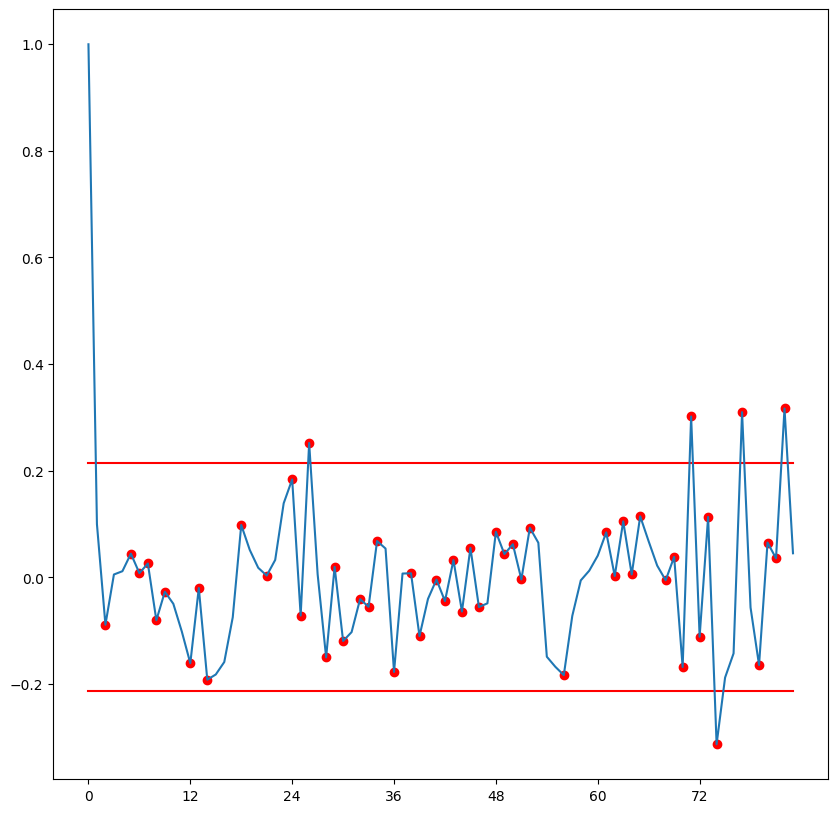

In [ ]:
list_values = station_met_outflow_60min_df[:168]['4']

peak_idx_acf = np.array([])
view_lags = int(len(list_values)/2) - 1
feat_len = 5

pacf1 = pacf(list_values, nlags=view_lags)
peak_idx_high = np.array((find_peaks(pacf1,height=(-0.7,0.7))[0]),dtype=int)
peak_idx_low = np.array((find_peaks(-1*pacf1,height=(-0.7,0.7))[0]),dtype=int)
peak_idx_acf = np.sort(np.concatenate((peak_idx_high, peak_idx_low),axis=0))
#print(f'peak index: {peak_idx_acf}')
x = list(range(0,len(pacf1)))
plt.figure(figsize=(10,10))
plt.plot(x,[1.96/np.sqrt(len(x))]*len(x), 'r')
plt.plot(x,[(-1*1.96)/np.sqrt(len(x))]*len(x),'r')
plt.plot(x,pacf1)
plt.xticks(np.arange(0, len(x),12))
plt.scatter(peak_idx_high,pacf1[peak_idx_high],color='red')
plt.scatter(peak_idx_low,pacf1[peak_idx_low],color='red')
plt.show()

signific_high_idx = np.where(pacf1[peak_idx_high] > 1.96/np.sqrt(len(x)))
signific_low_idx = np.where(pacf1[peak_idx_low] < (-1*1.96)/np.sqrt(len(x)))

positive_part_autocorr_lags = peak_idx_high[signific_high_idx][:feat_len]
positive_part_autocorr_lags = np.concatenate((positive_part_autocorr_lags,np.zeros(feat_len-len(positive_part_autocorr_lags))))
negative_part_autocorr_lags = peak_idx_low[signific_low_idx][:feat_len]
negative_part_autocorr_lags = np.concatenate((negative_part_autocorr_lags,np.zeros(feat_len-len(negative_part_autocorr_lags))))
print(positive_part_autocorr_lags)
print(negative_part_autocorr_lags)

In [ ]:
"""                                                                     FEATURE Extraction
Feature extracted: Interpretable Time series statistical features

1) High/Low average demand for each day of 7 days


"""
"""
every_days_avg_dem = average_demand(station_met_outflow_60min_df)
# ts_stats_feat_transform = feat_transformation()
# X_train_normalized = ts_stats_feat_transform.feature_normalization(X_train)
# print_msg = 'every_days_avg_dem'
# plot_all(print_msg).plot_hist_n_corr(X_train_normalized)
weekdays_avg_dem = every_days_avg_dem[:,:4] # excludes friday
weekends_avg_dem = every_days_avg_dem[:,4:] # includes friday

every_days_n95_dem = peak_n95_demand(station_met_outflow_60min_df)
# ts_stats_feat_transform = feat_transformation()
# X_train_normalized = ts_stats_feat_transform.feature_normalization(X_train)
# print_msg = 'every_days_avg_dem'
# plot_all(print_msg).plot_hist_n_corr(X_train_normalized)
weekdays_n95_dem = every_days_n95_dem[:,:4] # excludes friday
weekends_n95_dem = every_days_n95_dem[:,4:] # includes friday


every_days_max_dem = max_demand(station_met_outflow_60min_df)
# ts_stats_feat_transform = feat_transformation()
# X_train_normalized = ts_stats_feat_transform.feature_normalization(X_train)
# print_msg = 'every_days_avg_dem'
# plot_all(print_msg).plot_hist_n_corr(X_train_normalized)
weekdays_max_dem = every_days_max_dem[:,:4] # excludes friday
weekends_max_dem = every_days_max_dem[:,4:] # includes friday


no_mean_cross_Dem = no_mean_crossing_demand(station_met_outflow_60min_df)
# ts_stats_feat_transform = feat_transformation()
# X_train_normalized = ts_stats_feat_transform.feature_normalization(X_train)
# print_msg = 'every_days_avg_dem'
# plot_all(print_msg).plot_hist_n_corr(X_train_normalized)
weekdays_nmc_dem = no_mean_cross_Dem[:,:4] # excludes friday
weekends_nmc_dem = no_mean_cross_Dem[:,4:] # includes friday


max_deviation_from_n95 = outlier_demands(station_met_outflow_60min_df)
# ts_stats_feat_transform = feat_transformation()
# X_train_normalized = ts_stats_feat_transform.feature_normalization(X_train)
# print_msg = 'every_days_avg_dem'
# plot_all(print_msg).plot_hist_n_corr(X_train_normalized)
weekdays_max_dev_n95_dem = max_deviation_from_n95[:,:4] # excludes friday
weekends_max_dev_n95_dem = max_deviation_from_n95[:,4:] # includes friday


every_days_std_dem = std_demand(station_met_outflow_60min_df)
# ts_stats_feat_transform = feat_transformation()
# X_train_normalized = ts_stats_feat_transform.feature_normalization(X_train)
# print_msg = 'every_days_avg_dem'
# plot_all(print_msg).plot_hist_n_corr(X_train_normalized)
weekdays_std_dem = every_days_std_dem[:,:4] # excludes friday
weekends_std_dem = every_days_std_dem[:,4:] # includes friday


every_days_zero_dem = count_zero_demands(station_met_outflow_60min_df)
# ts_stats_feat_transform = feat_transformation()
# X_train_normalized = ts_stats_feat_transform.feature_normalization(X_train)
# print_msg = 'every_days_avg_dem'
# plot_all(print_msg).plot_hist_n_corr(X_train_normalized)
weekdays_zero_dem = every_days_zero_dem[:,:4] # excludes friday
weekends_zero_dem = every_days_zero_dem[:,4:] # includes friday


every_days_kurt = kurt_of_demands(station_met_outflow_60min_df)
# ts_stats_feat_transform = feat_transformation()
# X_train_normalized = ts_stats_feat_transform.feature_normalization(X_train)
# print_msg = 'every_days_avg_dem'
# plot_all(print_msg).plot_hist_n_corr(X_train_normalized)
weekdays_kurt = every_days_kurt[:,:4] # excludes friday
weekends_kurt = every_days_kurt[:,4:] # includes friday
"""

every_days_pos_autocorr_lags = weekday_demands_positive_autocorr_lags(station_met_outflow_60min_df)

#weekdays_pos_autocorr_lags= every_days_pos_autocorr_lags[:,:4] # excludes friday
#weekends_pos_autocorr_lags = every_days_pos_autocorr_lags[:,4:] # includes friday


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
"""                                                                     FEATURE Extraction

Feature extracted: Time series statistical features

1) Total demand, Mean, mode, median, upper & Lower whisker, max, min, std, kurtosis, skewness,
2)variance, standard deviation, Mean
3) Median, 25th percentile value, 75th percentile value
4) Root Mean Square value; square of the average of the squared amplitude values
5) The mean of the derivative
6) Zero crossing rate, i.e. the number of times a signal crosses y = 0
7) Mean crossing rate, i.e. the number of times a signal crosses y = mean(y)


"""
plt.close('all')

def calculate_entropy(list_values):
    counter_values = Counter(list_values).most_common()
    probabilities = [elem[1]/len(list_values) for elem in counter_values]
    entropy= stats.entropy(probabilities)
    return [entropy]

def calculate_crossings(list_values):
    mean_crossing_indices = np.nonzero(np.diff(np.array(list_values) >= np.nanmean(list_values)))[0]
    no_mean_crossings = len(mean_crossing_indices)
    return [no_mean_crossings]

def calculate_statistics(list_values):
    #n5 = np.nanpercentile(list_values, 5) # only zeros
    #n25 = np.nanpercentile(list_values, 25) # only zeros
    #n75 = np.nanpercentile(list_values, 75) # only zeros
    n95 = np.nanpercentile(list_values, 95)
    #median = np.nanpercentile(list_values, 50) # only zeros
    #mean = np.nanmean(list_values) # too correlated with others, help red dim.
    #std = np.nanstd(list_values) # too correlated with var, help red dim.
    var = np.nanvar(list_values)
    rms = np.nanmean(np.sqrt(list_values**2))
    #total_dem = np.nansum(list_values) # too correlated with others, help red dim.
    #mode = stats.mode(list_values,keepdims=True)[0][0] # only zeros
    #w = n25 - 1.5*stats.iqr(list_values) # only zeros
    #low_whisk = 0 if 0 >= w else w # only zeros
    #up_whisk = n75 + 1.5*stats.iqr(list_values) # only zeros
    kurt = stats.kurtosis(list_values)
    #skew = stats.skew(list_values) # too correlated with kurt, help red dim.
    max = np.nanmax(list_values)
    #min = np.nanmin(list_values) # only zeros
    #return [n5, n25, n75, n95, median, mean, std, var, rms, total_dem, mode, up_whisk, low_whisk, kurt, skew,max]#, min]
    return [n95,rms, var, kurt,max]

def get_features(list_values):
    entropy = calculate_entropy(list_values)
    crossings = calculate_crossings(list_values)
    statistics = calculate_statistics(list_values)
    return entropy + crossings + statistics


stations = unmet_60min_outflow_df.columns
X_train = np.empty(shape=(0,7))


for station in stations:
    # Perform the FFT on the data
    list_values = unmet_60min_outflow_df[station].values
    X_train = np.vstack((X_train, np.array(get_features(list_values)) ) )

ts_stats_feat_transform = feat_transformation()
X_train_normalized = ts_stats_feat_transform.feature_normalization(X_train)


print_msg = 'Summary statistics'
######### histogram plot #########
# check to see if any features are all zeros
######### plot correlation #########
# perform dimensionality reduction by removing highly correlated features.
plot_all(print_msg).plot_hist_n_corr(X_train_normalized)


In [ ]:
"""                                                                     PLOT UMAP for Time series statistical features

"""

plt.close('all')

#fig, ax_tsne_2d = plt.subplots(ncols=2,figsize=(25,7))
# fig_umap_2d = sp.make_subplots(rows=1, cols=1)
# fig_umap_3d = sp.make_subplots(specs=[[{'type': 'surface'} for i in range(1)]])
#fig_isomap_2d = sp.make_subplots(rows=1, cols=1)
#fig_isomap_3d = sp.make_subplots(specs=[[{'type': 'surface'} for i in range(1)]])

print_msg = 'Summary statistics'
plotter = plot_all(print_msg)
# plotter.plot_tSNE_2d(X_train_normalized,print_msg,ax_tsne_2d,0)
# fig.show()

# fig_umap_2d.add_trace(plotter.plot_UMAP_2d(X_train_normalized,print_msg),row=1,col=1)
# fig_umap_3d.add_trace(plotter.plot_UMAP_3d(X_train_normalized))

#fig_isomap_2d.add_trace(plotter.plot_ISOMAP_2d(X_train_normalized,print_msg),row=1,col=1)
#fig_isomap_3d.add_trace(plotter.plot_ISOMAP_3d(X_train_normalized,print_msg))

# fig_umap_2d.update_layout(height=900 , width=900,title='UMAP 2d,')
# fig_umap_2d.show()

# fig_umap_3d.update_layout(height=900 , width=900,title='UMAP 3d,')
# fig_umap_3d.show()

interactive_UMAP_plot=interactive(plotter.plot_UMAP_interactive,X_train=X_train_normalized,print_msg=print_msg,n_neighbors=(10,100,20),min_dist=(0,1.0,0.1),metric=['euclidean','mahalanobis','manhattan'])
display(interactive_UMAP_plot)

# interactive_umap_2d_plot=interactive(plotter.plot_UMAP_2d_interactive,X_train=X_train_normalized,print_msg=print_msg,n_neighbors=(10,100,10),min_dist=(0,1.0,0.1),metric=['euclidean','mahalanobis'])
# display(interactive_umap_2d_plot)


# fig_isomap_2d.update_layout(height=600 , width=600,title='ISOMAP 2d,')
# fig_isomap_2d.show()

#fig_isomap_3d.update_layout(height=600 , width=3000,title='ISOMAP 3d,')
# fig_isomap_3d.show()


In [ ]:
"""                                                                    ### DETAILED 3d UMAP for Time series statistical features

use above to get correct n_neighbors ,min_dist and metric to visuzalize in detain
"""
plt.close('all')

fig_umap_3d = sp.make_subplots(specs=[[{'type': 'surface'} for i in range(1)]])

fig_umap_3d.add_trace(plotter.plot_UMAP_3d(X_train_normalized,10,0.0,'manhattan'))

fig_umap_3d.update_layout(height=900 , width=900,title='UMAP 3d,'+print_msg)
fig_umap_3d.show()


In [ ]:
"""
Parameter search for best clustering using TS statistical Features

"""

best_score = 0
best_score_num_cluster_dict = {}
cov_mat = np.cov(X_train_normalized.T)

for metric in ['euclidean','manhattan','mahalanobis']:# need to implement mahalanobis distance
    if metric != 'mahalanobis':
        for min_cluster_size in range(5,80,5):
            for min_samples in range(1,40,2):
                for cluster_selection_method in ['eom','leaf']:
                    # for each combination of parameters of hdbscan
                    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,min_samples=min_samples,
                                          cluster_selection_method=cluster_selection_method, metric=metric,
                                          gen_min_span_tree=True).fit(X_train_normalized)
                    # DBCV score
                    score = hdb.relative_validity_
                    outliers = (np.array(hdb.labels_)==-1).sum()
                    best_score_num_cluster_dict[score] = [len(np.unique(hdb.labels_)),min_cluster_size,min_samples,cluster_selection_method,metric,outliers]
                    #print(f'score: {score}, num of unique clusters: {len(np.unique(hdb.labels_))}' )
                    # if we got a better DBCV, store it and the parameters
                    if score > best_score:
                        best_score = score
                        best_parameters = {'min_cluster_size': min_cluster_size,
                                  ' min_samples':  min_samples, 'cluster_selection_method': cluster_selection_method,
                                  'metric': metric}
    else: ## mahalanobis distance
        for min_cluster_size in range(5,80,5):
            for min_samples in range(1,40,2):
                for cluster_selection_method in ['eom','leaf']:
                    # for each combination of parameters of hdbscan
                    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,min_samples=min_samples,
                                          cluster_selection_method=cluster_selection_method, metric=metric,V=cov_mat,
                                          gen_min_span_tree=True).fit(X_train_normalized)
                    # DBCV score
                    score = hdb.relative_validity_
                    outliers = (np.array(hdb.labels_)==-1).sum()
                    best_score_num_cluster_dict[score] = [len(np.unique(hdb.labels_)),min_cluster_size,min_samples,cluster_selection_method,metric,outliers]
                    #print(f'score: {score}, num of unique clusters: {len(np.unique(hdb.labels_))}' )
                    # if we got a better DBCV, store it and the parameters
                    if score > best_score:
                        best_score = score
                        best_parameters = {'min_cluster_size': min_cluster_size,
                                  ' min_samples':  min_samples, 'cluster_selection_method': cluster_selection_method,
                                  'metric': metric}


print("Best DBCV score: {:.3f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
sorted(best_score_num_cluster_dict.items())[-40:]

In [ ]:
"""
Plot Minimum spanning tree and dbscan cluster hierarchy from TS statistical features
"""

plt.close('all')

clusterer = hdbscan.HDBSCAN(min_cluster_size= 5, min_samples= 1,cluster_selection_method='eom', metric='euclidean', gen_min_span_tree=True)
clusterer.fit(X_train_normalized)

fig = plt.figure(figsize=(10,5))
# Plotting the minimum spanning tree in the first subplot
clusterer.minimum_spanning_tree_.plot(
    edge_cmap='viridis',
    edge_alpha=0.6,
    edge_linewidth=2
)
fig.show()

fig = plt.figure(figsize=(20,10))
# Plotting the condensed tree in the second subplot
clusterer.condensed_tree_.plot(
    select_clusters=True,
    selection_palette=sns.color_palette(),
)
fig.show()

print(clusterer.labels_)

In [ ]:
"""
Visualize Time series statistical features of all clusters using parcoords plot

"""

plt.close('all')
plot_title = 'TS statistical features'
mother = 'rbio2.2'
limit_level = 2
angular_labels = ['entropy','no_mean_crossing','n95','rms', 'var', 'kurt','max']

X_train = ts_stats_feat_transform.inv_feature_normalization(X_train_normalized)

all_cluster_feat_mins, all_cluster_feat_maxs = plot_stations_of_clusters(clusterer.labels_, Dim_Red_unmet_60min_outflow_week_df,'unmet_demand',X_train_normalized,'par_coords',angular_labels,plot_title,mother,limit_level)



In [ ]:
"""
Visualize cluster representatives of Time series statistical features using parcoords plot

"""

plot_cluster_representatives(X_train_normalized, all_cluster_feat_mins, all_cluster_feat_maxs,'par_coords',angular_labels)


In [ ]:
"""
## Analysis of statistical features from parcoords plots

"""
plot_cluster_representatives(X_train, all_cluster_feat_mins, all_cluster_feat_maxs)

In [ ]:
"""
Plot all the wavelets to identify suitable mother wavelet for our demand time series
"""

"""
def plot_wav_families(discrete_wavelets):
    fig,ax = plt.subplots(nrows=1,ncols=len(discrete_wavelets),figsize=(25,3))
    for col_no, waveletname in enumerate(discrete_wavelets):
        wavelet = pywt.Wavelet(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry

        _ = wavelet.wavefun()
        wavelet_function = _[0]
        x_values = _[-1]

        ax[col_no].set_title("{}".format(waveletname), fontsize=16)
        ax[col_no].plot(x_values, wavelet_function)

    plt.show()
    return

for i in range(11):
  discrete_wavelets = pywt.wavelist(kind='discrete')[i*10:i*10 + 10]
  plot_wav_families(discrete_wavelets)
"""

In [ ]:
"""                                                                     FEATURE Extraction

Visualize detail coefficients in inverse Discrete Wavelet Transform

"""

plt.close('all')

def reconstruction_plot(yyy, **kwargs):
    ###"""Plot signal vector on x [0,1] independently of amount of values it contains."""
    #plt.figure()
    #plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)
    ym = np.median(yyy)
    plt.plot(np.linspace(0, 1., num=len(yyy)), yyy-ym, **kwargs)


def reconstruction_stem(yyy, xmax, **kwargs):
    ###"""Plot coefficient vector on x [0,1] independently of amount of values it contains."""
    ymax = yyy.max()
    plt.stem(np.linspace(0, 1., num=len(yyy)), yyy*(xmax/ymax), **kwargs)


### original ecg data
### x = pywt.data.ecg()
### w = pywt.Wavelet('sym5')
x = unmet_60min_outflow_df['5'].values
w = pywt.Wavelet('coif1')
nl = 8
coeffs = pywt.wavedec(x, w, level=nl)


'''
plt.figure()
plt.stem(coeffs[1]); plt.legend(['Lvl 6 detail coefficients'])
plt.figure()
plt.stem(coeffs[2]); plt.legend(['Lvl 5 detail coefficients'])
plt.figure()
plt.stem(coeffs[3]); plt.legend(['Lvl 4 detail coefficients'])
plt.figure()
plt.stem(coeffs[4]); plt.legend(['Lvl 3 detail coefficients'])
plt.figure()
plt.stem(coeffs[5]); plt.legend(['Lvl 2 detail coefficients'])
plt.figure()
plt.stem(coeffs[6]); plt.legend(['Lvl 1 detail coefficients'])
'''


xmax = x.max()
for i in range(nl):
    plt.figure(figsize=(40,7))
    reconstruction_plot(x) # original signal
    #reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction
    reconstruction_plot(pywt.waverec(coeffs[:i+2] + [None] * (nl-i-1), w)) # partial reconstruction
    reconstruction_stem(coeffs[i+1], xmax, markerfmt ='none', linefmt='r-')
    #plt.legend(['Original', 'Full reconstruction', ('Rec to lvl %d')%(nl-i), ('Details for lvl %d')%(nl-i)])
    plt.legend(['Original', ('Rec to lvl %d')%(nl-i), ('Details for lvl %d')%(nl-i)])



In [ ]:
"""                                                                     FEATURE Extraction

Feature extracted: Discrete Wavelet Transform after selecting some mother wavelets


"""
plt.close('all')

def features_info(unmet_60min_outflow_df,wave_name,limit_level):
    list_coeff = pywt.wavedec(unmet_60min_outflow_df['5'].values, wave_name)
    print('wave_name: ',wave_name)
    num_feats = 0
    for l,coeff in enumerate(list_coeff):
        lvl = max(0,l-1)
        print('level: ',lvl,' num_of_coeffs: ',len(coeff))
        if lvl <= limit_level:
            num_feats+=len(coeff)
    return num_feats

def get_stations_dwt_features(signal, waveletname,num_feats,limit_level):
    stations = signal.columns
    all_features = np.empty(shape=(0,num_feats))
    for station in stations:
        list_coeff = pywt.wavedec(signal[station].values, waveletname)
        features = np.hstack(list_coeff[:limit_level+2])
        features = features.reshape((1,num_feats))
        all_features = np.vstack((all_features,features))
    print('X_train shape: ',all_features.shape)
    return all_features


## shortlist mothers that have wavelets similar to portions of demand TS
## mothers = ['bior2.2','bior4.4','bior5.5','coif1','coif2','db3','db22','rbio2.2','rbio2.6','sym3','sym8']
## ONLY select mothers with higher multi-frequency resolution. i.e. higher depth/levels have better time localizations of frequnecy
mothers = ['bior2.2','coif1','db3','rbio2.2','sym3']
limit_level = 1 # includes this level

for mother in mothers:
    num_feats = features_info(unmet_60min_outflow_df,mother,limit_level)  # display number of feats
    X_train = get_stations_dwt_features(signal=unmet_60min_outflow_df, waveletname=mother,num_feats=num_feats,limit_level=limit_level) #choose wavelets and levels < 9, #output = 382 x 180 features

    ts_dwt_feat_transform = feat_transformation()
    X_train_dwt_normalized = ts_dwt_feat_transform.feature_normalization(X_train)

    print_msg = 'wavelet :'+mother

    break


In [ ]:
"""
Identify aggolmeratic clustering parameter combination with best silhouette score for DWT features

"""

plt.close('all')

mother = 'rbior'
limit_level = 2 # [0,1,2,3,4]


num_feats = features_info(unmet_60min_outflow_df,mother,limit_level)  # display number of feats
X_train = get_stations_dwt_features(signal=unmet_60min_outflow_df, waveletname=mother,num_feats=num_feats,limit_level=limit_level) #choose wavelets and levels < 9, #output = 382 x 180 features

ts_dwt_feat_transform = feat_transformation()
X_train_dwt_normalized = ts_dwt_feat_transform.feature_normalization(X_train)

num_clusters_list = range(2,35,1)


methods = ['single','complete','average']#['single','complete','average','weighted',]
metrics = ['euclidean','cityblock']
for metric in metrics:
    for method in methods:
        for num_clusters in num_clusters_list:
            model = AgglomerativeClustering(n_clusters=num_clusters, metric=metric, linkage=method)
            model.fit(X_train_dwt_normalized)
            labels = model.labels_
            plot_silhouette_scores(X_train_dwt_normalized,labels,metric,method)


methods = ['ward']#['median','centroid','ward']
metrics = ['euclidean']
for method in methods:
    for metric in metrics:
        for num_clusters in num_clusters_list:
            model = AgglomerativeClustering(n_clusters=num_clusters, metric=metric, linkage=method)
            model.fit(X_train_dwt_normalized)
            labels = model.labels_
            plot_silhouette_scores(X_train_dwt_normalized,labels,metric,method)


methods = ['complete','average']#['single','complete','average','weighted',]
metrics = ['mahalanobis','manhattan']
for metric in metrics:
    for method in methods:
        for num_clusters in num_clusters_list:
            model = AgglomerativeClustering(n_clusters=num_clusters, metric=metric, linkage=method)
            model.fit(X_train_dwt_normalized)
            labels = model.labels_
            plot_silhouette_scores(X_train_dwt_normalized,labels,metric,method)

In [ ]:
"""
Identify kmeans clustering parameter combination with best silhouette score for DWT features

"""

### xxxx POOR performance xxxx ###

metrics = ['euclidean']
methods = ['single','complete','average','ward']

for num_cluster in range(2,35,2):
    for metric in metrics:
        for method in methods:
            km = TimeSeriesKMeans(n_clusters=num_cluster, metric=metric)
            km.fit(X_train_dwt_normalized)
            plot_silhouette_scores(X_train_dwt_normalized,km.labels_,metric,method)
            #plot_stations_of_clusters(km.labels_, Dim_Red_unmet_60min_outflow_week_df,'unmet_demand')


In [ ]:
"""
Identify k-medoids clustering parameter combination with best silhouette score for DWT features

"""

### xxxx POOR performance xxxx ###

mahalanobis_dist = compute_mahalanobis_dist_mat(X_train_dwt_normalized)

for k in range(2,35,2):
    for method in methods:
        kmedoids = KMedoids(n_clusters=k, metric='precomputed', init='random', method="alternate").fit(mahalanobis_dist)
        plot_silhouette_scores(X_train_dwt_normalized,kmedoids.labels_,metric,method)



In [ ]:
"""
SHORTLISTED aggolmeratic clustering parameters combination for DWT features

"""

plt.close('all')
limit_level = 2

mother = 'rbio2.2'
num_feats = features_info(unmet_60min_outflow_df,mother,limit_level)  # display number of feats
X_train = get_stations_dwt_features(signal=unmet_60min_outflow_df, waveletname=mother,num_feats=num_feats,limit_level=limit_level) #choose wavelets and levels < 9, #output = 382 x 180 features

ts_dwt_feat_transform = feat_transformation()
X_train_dwt_normalized = ts_dwt_feat_transform.feature_normalization(X_train)

num_clusters_list = [21]

methods = ['complete']#['single','complete','average','weighted',]
metrics = ['cityblock']
for metric,method,num_clusters in zip(metrics,methods,num_clusters_list):
    print('\n',metric,method,num_clusters)
    plot_title = 'DWT features, '+ 'limit level: ' + str(limit_level) +', metric: '+metric+', method: '+', num_clusters: '+str(num_clusters)+'. '
    model = AgglomerativeClustering(n_clusters=num_clusters, metric=metric, linkage=method)
    model.fit(X_train_dwt_normalized)
    labels = model.labels_
    #plot_silhouette_scores(X_train_dwt_normalized,labels,metric,method)
    #all_cluster_feat_mins, all_cluster_feat_maxs = plot_stations_of_clusters(model.labels_, Dim_Red_unmet_60min_outflow_week_df,'unmet_demand',X_train_dwt_normalized,'polar')
    #plot_cluster_representatives(X_train, all_cluster_feat_mins, all_cluster_feat_maxs,'polar')
    all_cluster_feat_mins, all_cluster_feat_maxs = plot_stations_of_clusters(model.labels_, Dim_Red_unmet_60min_outflow_week_df,'unmet_demand',X_train_dwt_normalized,'par_coords',range(X_train_dwt_normalized.shape[1]),plot_title,mother,limit_level)
    #plot_cluster_representatives(X_train_dwt_normalized, all_cluster_feat_mins, all_cluster_feat_maxs,'par_coords',range(X_train_dwt_normalized.shape[1]))
    #plot_cluster_representatives(X_train_dwt_normalized, all_cluster_feat_mins, all_cluster_feat_maxs,'polar',range(X_train_dwt_normalized.shape[1]))



"""
mother = 'rbio2.2'
num_feats = features_info(unmet_60min_outflow_df,mother,limit_level)  # display number of feats
X_train = get_stations_dwt_features(signal=unmet_60min_outflow_df, waveletname=mother,num_feats=num_feats,limit_level=limit_level) #choose wavelets and levels < 9, #output = 382 x 180 features

ts_dwt_feat_transform = feat_transformation()
X_train_dwt_normalized = ts_dwt_feat_transform.feature_normalization(X_train)


num_clusters_list = [23,10,8]
methods = ['complete','complete','complete']#['single','complete','average','weighted',]
metrics = ['cityblock',,'cityblock','cityblock']
for metric,method,num_clusters in zip(metrics,methods,num_clusters_list):
    print('\n',metric,method,num_clusters)
    plot_title = 'DWT features, '+ 'limit level: ' + str(limit_level) +', metric: '+metric+', method: '+', num_clusters: '+str(num_clusters)+'. '
    model = AgglomerativeClustering(n_clusters=num_clusters, metric=metric, linkage=method)
    model.fit(X_train_dwt_normalized)
    labels = model.labels_
    #plot_silhouette_scores(X_train_dwt_normalized,labels,metric,method)
    #all_cluster_feat_mins, all_cluster_feat_maxs = plot_stations_of_clusters(model.labels_, Dim_Red_unmet_60min_outflow_week_df,'unmet_demand',X_train_dwt_normalized,'polar')
    #plot_cluster_representatives(X_train, all_cluster_feat_mins, all_cluster_feat_maxs,'polar')
    all_cluster_feat_mins, all_cluster_feat_maxs = plot_stations_of_clusters(model.labels_, Dim_Red_unmet_60min_outflow_week_df,'unmet_demand',X_train_dwt_normalized,'par_coords',range(X_train_dwt_normalized.shape[1]),plot_title)
    #plot_cluster_representatives(X_train_dwt_normalized, all_cluster_feat_mins, all_cluster_feat_maxs,'par_coords',range(X_train_dwt_normalized.shape[1]))
    #plot_cluster_representatives(X_train_dwt_normalized, all_cluster_feat_mins, all_cluster_feat_maxs,'polar',range(X_train_dwt_normalized.shape[1]))



num_clusters_list = [13,24]
methods = ['complete','average']#['single','complete','average','weighted',]
metrics = ['euclidean','cityblock']
for metric,method,num_clusters in zip(metrics,methods,num_clusters_list):
    print('\n',metric,method,num_clusters)
    plot_title = 'DWT features, '+ 'limit level: ' + str(limit_level) +', metric: '+metric+', method: '+', num_clusters: '+str(num_clusters)+'. '
    model = AgglomerativeClustering(n_clusters=num_clusters, metric=metric, linkage=method)
    model.fit(X_train_dwt_normalized)
    labels = model.labels_
    #plot_silhouette_scores(X_train_dwt_normalized,labels,metric,method)
    #all_cluster_feat_mins, all_cluster_feat_maxs = plot_stations_of_clusters(model.labels_, Dim_Red_unmet_60min_outflow_week_df,'unmet_demand',X_train_dwt_normalized,'polar')
    #plot_cluster_representatives(X_train, all_cluster_feat_mins, all_cluster_feat_maxs,'polar')
    all_cluster_feat_mins, all_cluster_feat_maxs = plot_stations_of_clusters(model.labels_, Dim_Red_unmet_60min_outflow_week_df,'unmet_demand',X_train_dwt_normalized,'par_coords',range(X_train_dwt_normalized.shape[1]),plot_title)
    #plot_cluster_representatives(X_train_dwt_normalized, all_cluster_feat_mins, all_cluster_feat_maxs,'par_coords',range(X_train_dwt_normalized.shape[1]))
    #plot_cluster_representatives(X_train_dwt_normalized, all_cluster_feat_mins, all_cluster_feat_maxs,'polar',range(X_train_dwt_normalized.shape[1]))
"""

In [ ]:
"""                                                                     PLOT UMAP for Discrete Wavelet Transform features

"""
plt.close('all')
mother = 'bior2.2'

num_feats = features_info(unmet_60min_outflow_df,mother,limit_level)  # display number of feats
X_train = get_stations_dwt_features(signal=unmet_60min_outflow_df, waveletname=mother,num_feats=num_feats,limit_level=limit_level) #choose wavelets and levels < 9, #output = 382 x 180 features

ts_dwt_feat_transform = feat_transformation()
X_train_dwt_normalized = ts_dwt_feat_transform.feature_normalization(X_train)


plt.close('all')
plotter_dwt = plot_all(print_msg)
interactive_UMAP_plot=interactive(plotter_dwt.plot_UMAP_interactive,X_train=X_train_dwt_normalized,print_msg=print_msg,n_neighbors=(10,100,20),min_dist=(0,1.0,0.1),metric=['euclidean','mahalanobis','manhattan'])
display(interactive_UMAP_plot)

In [ ]:
"""                                                                    ### DETAILED 3d UMAP for Discrete wavelet features

use above to get correct n_neighbors ,min_dist and metric to visuzalize in detain
"""
plt.close('all')

fig_umap_3d = sp.make_subplots(specs=[[{'type': 'surface'} for i in range(1)]])

fig_umap_3d.add_trace(plotter_dwt.plot_UMAP_3d(X_train_dwt_normalized,30,0.1,'manhattan'))

fig_umap_3d.update_layout(height=900 , width=900,title='UMAP 3d,'+print_msg)
fig_umap_3d.show()

In [ ]:
plot_cluster_representatives(X_train, all_cluster_feat_mins, all_cluster_feat_maxs,'polar')

In [ ]:






# mahalanobis_dist_mat = compute_mahalanobis_dist_mat(X_train_dwt_normalized)
# agg = AgglomerativeClustering(n_clusters=25, metric='precomputed', linkage = 'complete')
# agg.fit_predict(mahalanobis_dist_mat)  # Returns class labels.





In [ ]:
"""                                 Distance Matrix calculation
Distance Measure: Pearson Correlation and Spearman's correlation

"""

"""
stations = unmet_60min_outflow_df.columns
unique_station_pairs = list(combinations(stations, 2))

## station to index map
station_to_index_map = {}
i=0
for s in stations:
    station_to_index_map[s] = i
    i+=1

## index to station map
index_to_station_map = {}
i=0
for s in stations:
    index_to_station_map[i] = s
    i+=1

## create indices of 2d distance matrix
arr_dim = len(stations)
index = []
rows = 1
for c in np.arange(arr_dim-1):
  for r in np.arange(rows,arr_dim):
    index.append((r,c))
  rows = rows+1

pearson_distance_matrix = pd.DataFrame(columns=unique_station_pairs,index=range(1))
pearr_arr = np.array([])
pearr_arr_2d = np.zeros(shape=(len(stations),len(stations)))
i=0
for pair in unique_station_pairs:
    r, p = stats.pearsonr(unmet_60min_outflow_df[pair[0]].values, unmet_60min_outflow_df[pair[1]].values)
    pearr_arr = np.append(pearr_arr,r)
    pearr_arr_2d[index[i]] = r
    i+=1
pearson_distance_matrix.loc[0] = pearr_arr
pearr_arr_2d = pearr_arr_2d + pearr_arr_2d.T # to make it symmetric
pearr_arr_2d = 1 - pearr_arr_2d # convert disimilarity to similarity for all clusterings
np.fill_diagonal(pearr_arr_2d, 0)


spearmans_distance_matrix = pd.DataFrame(columns=unique_station_pairs,index=range(1))
spearr_arr = np.array([])
spearr_arr_2d = np.zeros(shape=(len(stations),len(stations)))
i=0
for pair in unique_station_pairs:
    r, p = stats.spearmanr(unmet_60min_outflow_df[pair[0]].values, unmet_60min_outflow_df[pair[1]].values)
    spearr_arr = np.append(spearr_arr,r)
    spearr_arr_2d[index[i]] = r
    i+=1
spearmans_distance_matrix.loc[0] = spearr_arr
spearr_arr_2d = spearr_arr_2d + spearr_arr_2d.T # to make it symmetric
spearr_arr_2d = 1 - spearr_arr_2d # convert disimilarity to similarity for all clusterings
np.fill_diagonal(spearr_arr_2d, 0)

pd.DataFrame(pearr_arr_2d).to_csv('pearson_distance_matrix_2d.csv',index=False)
pd.DataFrame(spearr_arr_2d).to_csv('spearman_distance_matrix_2d.csv',index=False)
pearson_distance_matrix.to_csv('pearson_distance_matrix.csv',index=False)
spearmans_distance_matrix.to_csv('spearmans_distance_matrix.csv',index=False)
"""


In [ ]:
pearr_arr_2d = pd.read_csv('pearson_distance_matrix_2d.csv')
pearr_arr_2d = pearr_arr_2d.to_numpy()

spearr_arr_2d = pd.read_csv('spearman_distance_matrix_2d.csv')
spearr_arr_2d = spearr_arr_2d.to_numpy()

#pearson_distance_matrix = pd.read_csv('pearson_distance_matrix.csv')
pearson_distance_vector = pd.read_csv('pearson_distance_matrix.csv')


#spearmans_distance_matrix = pd.read_csv('spearmans_distance_matrix.csv')
spearmans_distance_vector = pd.read_csv('spearmans_distance_matrix.csv')


In [ ]:
"""                                                      Naive Analysis of pearson and spearman distance

Can we just rank the distance matrix and group the largest positive/negative and smallest correlation ???
"""

"""
plt.hist(spearmans_distance_matrix.loc[0].values,bins=100000)
plt.title('histogram')
plt.xlabel('spearmans_corr_dist_matrix')
plt.show()
plt.hist(pearson_distance_matrix.loc[0].values,bins=100000)
plt.title('histogram')
plt.xlabel('pearson_corr_dist_matrix')
plt.show()
"""

pearson_distance_vector = pd.read_csv('pearson_distance_matrix.csv')
pearson_df = pd.DataFrame({'pearson':pearson_distance_vector.loc[0].values})
fig = px.histogram(pearson_df, x="pearson",nbins=100000)
fig.show()

spearmans_distance_vector = pd.read_csv('spearmans_distance_matrix.csv')
spearman_df = pd.DataFrame({'spearman':spearmans_distance_vector.loc[0].values})
fig = px.histogram(spearman_df, x="spearman",nbins=100000)
fig.show()


# image = mpimg.imread('pearsons_hist_number_of_cluster.PNG')
# plt.imshow(image)
# plt.show()

# image = mpimg.imread('spearmans_hist_number_of_cluster.PNG')
# plt.imshow(image)
# plt.show()

In [ ]:
"""                                                               Distance Matrix calculation
Distance Measure: Dynamic Time Warping

"""

"""
stations = unmet_60min_outflow_df.columns
unique_station_pairs = list(combinations(stations, 2))

## station to index map
station_to_index_map = {}
i=0
for s in stations:
    station_to_index_map[s] = i
    i+=1

## index to station map
index_to_station_map = {}
i=0
for s in stations:
    index_to_station_map[i] = s
    i+=1

## create indices of 2d distance matrix
arr_dim = len(stations)
index = []
rows = 1
for c in np.arange(arr_dim-1):
  for r in np.arange(rows,arr_dim):
    index.append((r,c))
  rows = rows+1

dtw_distance_matrix = pd.DataFrame(columns=unique_station_pairs,index=range(1))
dtw_arr = np.array([])
dtw_arr_2d = z = np.zeros(shape=(len(stations),len(stations)))
i=0
for pair in unique_station_pairs:
    dtw_dist = dtw(unmet_60min_outflow_df[pair[0]].values, unmet_60min_outflow_df[pair[1]].values)
    dtw_arr = np.append(dtw_arr,dtw_dist)
    dtw_arr_2d[index[i]] = dtw_dist
    i+=1
dtw_distance_matrix.loc[0] = dtw_arr
dtw_arr_2d = dtw_arr_2d + dtw_arr_2d.T # to make it symmetric
dtw_arr_2d = dtw_arr_2d + 1 # to make corr non-negative


pd.DataFrame(dtw_arr_2d).to_csv('dtw_distance_matrix_2d.csv',index=False)

dtw_distance_matrix.to_csv('dtw_distance_matrix.csv',index=False)

dtw_arr_2d = pd.read_csv('dtw_distance_matrix_2d.csv')
dtw_arr_2d = dtw_arr_2d.to_numpy()

dtw_distance_vector = pd.read_csv('dtw_distance_matrix.csv')
"""



In [ ]:

"""                                                                Naive Analysis of DTW distance

Can we just rank the distance matrix and group the largest positive/negative and smallest dtw ???
"""
dtw_distance_vector = pd.read_csv('dtw_distance_matrix.csv')
# plt.figure(figsize=(50,10))
# plt.hist(dtw_distance_vector.loc[0].values,bins=100000)
# plt.title('histogram')
# plt.xlabel('dynamic_time_warping_dist_matrix')
# plt.savefig('dtw_hist_number_of_cluster.PNG')
# plt.show()

dtw_df = pd.DataFrame({'dtw':dtw_distance_vector.loc[0].values})
fig = px.histogram(dtw_df, x="dtw",nbins=100000)
fig.show()

"""
image = mpimg.imread('dtw_hist_number_of_cluster.PNG')
plt.imshow(image)
plt.show()
"""

In [ ]:
"""                                 Distance Matrix calculation
Distance Measure: Longest common subsequence, LCSS

"""

"""
stations = unmet_60min_outflow_df.columns
unique_station_pairs = list(combinations(stations, 2))

## station to index map
station_to_index_map = {}
i=0
for s in stations:
    station_to_index_map[s] = i
    i+=1

## index to station map
index_to_station_map = {}
i=0
for s in stations:
    index_to_station_map[i] = s
    i+=1

## create indices of 2d distance matrix
arr_dim = len(stations)
index = []
rows = 1
for c in np.arange(arr_dim-1):
  for r in np.arange(rows,arr_dim):
    index.append((r,c))
  rows = rows+1

lcss_distance_matrix = pd.DataFrame(columns=unique_station_pairs,index=range(1))
lcss_arr = np.array([])
lcss_arr_2d = z = np.zeros(shape=(len(stations),len(stations)))
i=0
for pair in unique_station_pairs:
    x = unmet_60min_outflow_df[pair[0]].values
    y = unmet_60min_outflow_df[pair[1]].values
    xNormed = (x - x.mean())/(x.std()) # standardize the TS
    yNormed = (y - y.mean())/(y.std()) # standardize the TS
    lcss_dist = lcss(s1 = xNormed, s2 = yNormed ,eps=0.3, global_constraint= "sakoe_chiba",sakoe_chiba_radius=0.3)
    lcss_arr = np.append(lcss_arr,lcss_dist)
    lcss_arr_2d[index[i]] = lcss_dist
    i+=1
lcss_distance_matrix.loc[0] = lcss_arr
lcss_arr_2d = lcss_arr_2d + lcss_arr_2d.T # to make it symmetric
lcss_arr_2d = 1 - lcss_arr_2d # to make similarity to distance matrix


pd.DataFrame(lcss_arr_2d).to_csv('lcss_distance_matrix_2d.csv',index=False)
lcss_distance_matrix.to_csv('lcss_distance_matrix.csv',index=False)
"""


lcss_arr_2d = pd.read_csv('lcss_distance_matrix_2d.csv')
lcss_arr_2d = lcss_arr_2d.to_numpy()


#lcss_distance_vector = pd.read_csv('lcss_distance_matrix.csv')



In [ ]:

"""                                                                Naive Analysis of lcss distance

Can we just rank the distance matrix and group the largest positive/negative and smallest lcss ???
"""
lcss_distance_vector = pd.read_csv('lcss_distance_matrix.csv')
# plt.figure(figsize=(50,10))
# plt.hist(dtw_distance_vector.loc[0].values,bins=100000)
# plt.title('histogram')
# plt.xlabel('dynamic_time_warping_dist_matrix')
# plt.savefig('dtw_hist_number_of_cluster.PNG')
# plt.show()

lcss_df = pd.DataFrame({'lcss':lcss_distance_vector.loc[0].values})
fig = px.histogram(lcss_df, x="lcss",nbins=100000)
fig.show()

"""
image = mpimg.imread('dtw_hist_number_of_cluster.PNG')
plt.imshow(image)
plt.show()
"""

In [ ]:
"""                                                                     FEATURE Extraction

Feature extracted: Fast Fourier Transform

1) Identify the top 10 frequency components in each time series
2) Identify all the unique frequency components from all time series
3) Identify these frequency components in each time series
4) Use the magnitudes of these FIXED frequency components as features for each series.

"""

stations = unmet_60min_outflow_df.columns
#unique_station_pairs = list(combinations(stations, 2))

top_x_frequencies = 5
num_common_freq=180
common_freq_set = set()
X_train = np.empty(shape=(0,num_common_freq))

for station in stations:
    # Perform the FFT on the data
    fft_result = np.fft.fft(unmet_60min_outflow_df[station].values)
    # Compute the magnitudes of the FFT result
    fft_magnitudes = np.abs(fft_result)
    # Generate the corresponding frequency axis
    sampling_rate = 1.0  # Assuming a sampling rate of 1.0 (change as needed)
    frequency_axis = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
    positive_freq_indices = np.where(frequency_axis >= 0)

    """ TOP periods/frequencies in the time series"""
    # Sort the magnitudes and frequencies in descending order
    sorted_indices = np.argsort(fft_magnitudes[positive_freq_indices])[::-1]
    sorted_magnitudes = fft_magnitudes[positive_freq_indices][sorted_indices]
    sorted_frequencies = frequency_axis[positive_freq_indices][sorted_indices]
    # Select the top periods
    top_mag = sorted_magnitudes[1:top_x_frequencies+1]
    top_freq = sorted_frequencies[1:top_x_frequencies+1] # REMOVE dc/mean component
    common_freq_set.update(top_freq)
    #print("Top mag: ",top_mag )

common_freq_arr = np.sort(np.array(list(common_freq_set)))#[:num_common_freq]
#common_freq_arr = np.sort(np.array(list(common_freq_set)))[:num_common_freq]


for station in stations:
    # Perform the FFT on the data
    fft_result = np.fft.fft(unmet_60min_outflow_df[station].values)
    # Compute the magnitudes of the FFT result
    fft_magnitudes = np.abs(fft_result)
    # Generate the corresponding frequency axis
    sampling_rate = 1.0  # Assuming a sampling rate of 1.0 (change as needed)
    frequency_axis = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
    positive_freq_indices = np.where(frequency_axis >= 0)

    unique_freqs_indices = np.where(np.isin(frequency_axis[positive_freq_indices], common_freq_arr))[0]
    #print(len(unique_freqs_indices))
    fft_mag_arr = fft_magnitudes[positive_freq_indices][unique_freqs_indices]
    normalized_magnitudes = fft_mag_arr / np.max(fft_mag_arr) # normalize it so that they are comparable

    X_train = np.vstack((X_train,normalized_magnitudes[:num_common_freq]))
    #X_train = np.vstack((X_train,normalized_magnitudes))

#print(X_train.shape)

X_train = feature_standardization(X_train)

fig, ax_tsne_2d = plt.subplots(ncols=2,figsize=(25,7))
fig_umap_2d = sp.make_subplots(rows=1, cols=1)
fig_umap_3d = sp.make_subplots(specs=[[{'type': 'surface'} for i in range(1)]])
fig_isomap_2d = sp.make_subplots(rows=1, cols=1)
fig_isomap_3d = sp.make_subplots(specs=[[{'type': 'surface'} for i in range(1)]])

print_msg = 'FFT'
plotter = plot_all(print_msg)
plotter.plot_tSNE_2d(X_train,print_msg,ax_tsne_2d,0)
fig.show()

fig_umap_2d.add_trace(plotter.plot_UMAP_2d(X_train,print_msg),row=1,col=1)
fig_umap_3d.add_trace(plotter.plot_UMAP_3d(X_train,))

fig_isomap_2d.add_trace(plotter.plot_ISOMAP_2d(X_train,print_msg),row=1,col=1)
fig_isomap_3d.add_trace(plotter.plot_ISOMAP_3d(X_train,print_msg))

fig_umap_2d.update_layout(height=600 , width=600,title='UMAP 2d, '+print_msg)
fig_umap_2d.show()

fig_umap_3d.update_layout(height=600 , width=600,title='UMAP 3d, '+print_msg)
fig_umap_3d.show()

fig_isomap_2d.update_layout(height=600 , width=600,title='ISOMAP 2d, '+print_msg)
fig_isomap_2d.show()

fig_isomap_3d.update_layout(height=600 , width=600,title='ISOMAP 3d, '+print_msg)
fig_isomap_3d.show()



In [ ]:
"""                                                                   CLUSTERING Analysis
Kmeans clustering using dimensionality reduced TS

"""


"""
silhouette_index = []
min_clusters = 2
max_clusters = 30

X_train = Dim_Red_unmet_60min_outflow_week_df.to_numpy().T

for num_clsuter in range(min_clusters,max_clusters):
  km = TimeSeriesKMeans(n_clusters=30, metric="dtw")
  km.fit(X_train)
  score = silhouette_score(X_train, km.labels_, metric="dtw")
  silhouette_index.append(score)

plt.figure(figsize=(15,5))
plt.xticks(range(min_clusters,max_clusters))
plt.plot(range(min_clusters,max_clusters),silhouette_index) # mean score for all samples. It is between [-1,1] where -1 needs reassignment, 1 is best.
plt.title('Number of clusters selection for kmeans')
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')
plt.savefig('silhouette_score_kmeans.PNG')
plt.show()
"""

image = mpimg.imread('silhouette_score_kmeans.PNG')
plt.figure(figsize=(15,5))
plt.imshow(image)
plt.show()

proposed_number_of_clusters = 3#25,

for num_clsuter in [proposed_number_of_clusters]:
  km = TimeSeriesKMeans(n_clusters=num_clsuter, metric="dtw")
  X_train = Dim_Red_unmet_60min_outflow_week_df
  km.fit(X_train)
  plot_stations_of_clusters(km.labels_, Dim_Red_unmet_60min_outflow_week_df,'unmet_demand')



In [ ]:
proposed_number_of_clusters = 15#25,

for num_clsuter in [proposed_number_of_clusters]:
  km = TimeSeriesKMeans(n_clusters=num_clsuter, metric="dtw")
  X_train = Dim_Red_unmet_60min_outflow_week_df
  km.fit(X_train)
  plot_stations_of_clusters(km.labels_, Dim_Red_unmet_60min_outflow_week_df,'unmet_demand')




In [ ]:
proposed_number_of_clusters = 25#25,

for num_clsuter in [proposed_number_of_clusters]:
  km = TimeSeriesKMeans(n_clusters=num_clsuter, metric="dtw")
  X_train = Dim_Red_unmet_60min_outflow_week_df
  km.fit(X_train)
  plot_stations_of_clusters(km.labels_, Dim_Red_unmet_60min_outflow_week_df,'unmet_demand')



In [ ]:
"""                                                                   CLUSTERING Analysis

K-Medoids using pearson and spearman distance matrix
"""

## pearson correlation
silhouette_index = []
min_clusters = 2
max_clusters = 200
intertia_list = []
dist_metric = 'correlation'

X_train = Dim_Red_unmet_60min_outflow_week_df.to_numpy().T

for k in range(min_clusters, max_clusters):
    #kmedoids = KMedoids(n_clusters=k, metric='precomputed', init='random', method="alternate").fit(pearr_arr_2d)
    kmedoids = KMedoids(n_clusters=k, metric=dist_metric, init='random', method="alternate").fit(X_train)
    intertia_list.append(kmedoids.inertia_)
    #X_train = Dim_Red_unmet_60min_outflow_week_df
    score = silhouette_score(pearr_arr_2d, kmedoids.labels_, metric='precomputed')
    silhouette_index.append(score)


plt.figure(figsize=(15,5))
plt.xticks(range(min_clusters,max_clusters))
plt.plot(range(min_clusters,max_clusters),silhouette_index) # mean score for all samples. It is between [-1,1] where -1 needs reassignment, 1 is best. # Scores around zero indicate overlapping clusters.
plt.title('Number of clusters selection for K-Medoids')
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')
plt.savefig('silhouette_score_K-Medoids_pearson.PNG')
plt.show()

"""
image = mpimg.imread('silhouette_score_K-Medoids.PNG')
plt.figure(figsize=(15,5))
plt.imshow(image)
plt.show()
"""

# ## spearman correlation
# max_num_clusters_spr = 3
# labels_list_spr = []
# cluster_centers_list_spr = []
# intertia_list_spr = []
# for k in range(2, max_num_clusters_spr):
#     kmedoids = KMedoids(n_clusters=k, metric="precomputed", method="pam").fit(spearr_arr_2d)
#     labels_list_spr.append(kmedoids.labels_)
#     cluster_centers_list_spr.append(kmedoids.cluster_centers_)
#     intertia_list_spr.append(kmedoids.inertia_)







In [ ]:
"""                                                                   CLUSTERING Analysis

K-Medoids using DTW distance matrix
"""

dtw_arr_2d = pd.read_csv('dtw_distance_matrix_2d.csv')
dtw_arr_2d = dtw_arr_2d.to_numpy()
#dtw_arr_2d = dtw_arr_2d - 1

## pearson correlation
silhouette_index = []
min_clusters = 2
max_clusters = 40
dist_metric = 'dtw'

X_train = Dim_Red_unmet_60min_outflow_week_df.to_numpy().T

for k in range(min_clusters, max_clusters):
    kmedoids = KMedoids(n_clusters=k, metric='precomputed', init='random', method="alternate").fit(dtw_arr_2d)
    #kmedoids = KMedoids(n_clusters=k, metric=dist_metric, init='random', method="alternate").fit(X_train)
    #X_train = Dim_Red_unmet_60min_outflow_week_df
    score = silhouette_score(X_train, kmedoids.labels_, metric=dist_metric)
    silhouette_index.append(score)


plt.figure(figsize=(15,5))
plt.xticks(range(min_clusters,max_clusters))
plt.plot(range(min_clusters,max_clusters),silhouette_index) # mean score for all samples. It is between [-1,1] where -1 needs reassignment, 1 is best. # Scores around zero indicate overlapping clusters.
plt.title('Number of clusters selection for K-Medoids with dynamic time warping')
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')
plt.savefig('silhouette_score_K-Medoids_dtw.PNG')
plt.show()

In [ ]:
lcss_arr_2d

In [ ]:
"""                                                                   CLUSTERING Analysis

K-Medoids using LCSS distance matrix
"""

lcss_arr_2d = pd.read_csv('lcss_distance_matrix_2d.csv')
lcss_arr_2d = lcss_arr_2d.to_numpy()
np.fill_diagonal(lcss_arr_2d, 0)

silhouette_index = []
min_clusters = 2
max_clusters = 40
dist_metric = 'lcss'

X_train = Dim_Red_unmet_60min_outflow_week_df.to_numpy().T

for k in range(min_clusters, max_clusters):
    kmedoids = KMedoids(n_clusters=k, metric='precomputed', method="pam",max_iter=1000).fit(lcss_arr_2d)
    #kmedoids = KMedoids(n_clusters=k, metric=dist_metric, init='random', method="alternate").fit(X_train)
    #X_train = Dim_Red_unmet_60min_outflow_week_df
    score = silhouette_score(lcss_arr_2d, kmedoids.labels_, metric="precomputed")
    silhouette_index.append(score)


plt.figure(figsize=(15,5))
plt.xticks(range(min_clusters,max_clusters))
plt.plot(range(min_clusters,max_clusters),silhouette_index) # mean score for all samples. It is between [-1,1] where -1 needs reassignment, 1 is best. # Scores around zero indicate overlapping clusters.
plt.title('Number of clusters selection for K-Medoids with longest common subsequence')
plt.xlabel('number of clusters')
plt.ylabel('silhouette_score')
plt.savefig('silhouette_score_K-Medoids_LCSS.PNG')
plt.show()

In [ ]:
arr = Dim_Red_unmet_60min_outflow_week_df.to_numpy()
arr.T.shape

In [ ]:
X = np.asarray([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])
X.shape

In [ ]:
print(kmedoids.cluster_centers_)

In [ ]:
"""                                                                   CLUSTERING Analysis

DBSCAN using pearson and spearman distance matrix
"""

########## SOMETHING WRONG HERE!!!!!!!!!!!!!!!!!!!!



dbscan = DBSCAN(eps=0.05, min_samples=5,metric="precomputed")
dbscan.fit(pearr_arr_2d)

dbscan.labels_

dbscan = DBSCAN(eps=0.05, min_samples=5,metric="precomputed")
dbscan.fit(spearr_arr_2d)

dbscan.labels_

In [ ]:
"""                                                                   CLUSTERING Analysis

HDBSCAN using pearson and spearman distance matrix
"""

clusterer = hdbscan.HDBSCAN(metric='precomputed',min_cluster_size=2).fit(pearr_arr_2d)
clusterer.labels_

clusterer = hdbscan.HDBSCAN(metric='precomputed',min_cluster_size=2).fit(spearr_arr_2d)
clusterer.labels_

In [ ]:
"""                                                                   CLUSTERING Analysis
Agglomerative clustering using pearson and spearman distance matrix

"""

clustering = AgglomerativeClustering(metric='precomputed',linkage='complete' ).fit(pearr_arr_2d)
clustering.labels_


clustering = AgglomerativeClustering(metric='precomputed',linkage='complete' ).fit(spearr_arr_2d)
clustering.labels_

In [ ]:
"""                                                                   CLUSTERING Analysis

K-Medoids using Dynamic Time Warping
"""



In [ ]:
"""                                                               Distance Matrix calculation
Distance Measure: Longest common subsequence

"""

In [ ]:
"""                                                                   CLUSTERING Analysis

K-Medoids using  Longest common subsequence
"""



In [ ]:
"""
Feature extracted: Top 5 ACF/PACF lags

"""

projection = TSNE().fit_transform(data)
plt.scatter(*projection.T, **plot_kwds)



umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

In [ ]:
"""
Feature extracted: Total demand, Mean, mode median, upper & Lower whisker, max, min, std, kurtosis, skewness,

"""

projection = TSNE().fit_transform(data)
plt.scatter(*projection.T, **plot_kwds)



umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df.species, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

In [ ]:
"""
Feature extracted: Discrete Wavelet Transform (DWT)

"""

In [ ]:
"""
Feature extracted: Symbolic Aggregate approximation (SAX)

"""

In [ ]:
"""
STATION-LEVEL

Compare with information from actual transaction logs

Form connectivity matrix for each hour from trascation logs.

connectivity matrix = number of cars leaving a source and entering destination

    destination stn
       A B C D E
s    A
o    B
u    C
r    D
c    E
e
stn

Create frobenius/euclidean norm of each matrix to quantify large activity
Rank the matrices to identify hours of maxium activity
Compare the results with correlation analysis from above.

"""

#TODO : ADITI

In [ ]:
"""
#UNMET demand

Identify clusters of regions that show similar behaviour.
Use a Similarity/distance metric to find Similarity/distance between the entire time series of all pairs of regions
Ranking of entire time series similairy for each region with all the other regions.
After finding all pariwise distances, cluster them so that a region's nearest neighbours can be identified on a 2D or 3D plot
Try out different Similarity/distance metrics and repeat steps
Try to form interpretations of theses clusterings. e.g. residential/office/etc.. High/low demand. peak/non-peak season
"""

os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\\region_level\outflow_data')
region_unmet_outflow_df = pd.read_csv('region_unmet_outflow.csv')
region_unmet_outflow_df = region_unmet_outflow_df.rename(columns={"Unnamed: 0": "datetime"})
region_unmet_outflow_df


#TODO: Aditi



In [ ]:
"""
#MET demand

Identify clusters of regions that show similar behaviour.
Use a Similarity/distance metric to find Similarity/distance between the entire time series of all pairs of regions
Ranking of entire time series similairy for each region with all the other regions.
After finding all pariwise distances, cluster them so that a region's nearest neighbours can be identified on a 2D or 3D plot
Try out different Similarity/distance metrics and repeat steps
Try to form interpretations of theses clusterings. e.g. residential/office/etc.. High/low demand. peak/non-peak season

"""
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\\region_level\outflow_data')
region_met_outflow_df = pd.read_csv('region_met_outflow.csv')
region_met_outflow_df = region_met_outflow_df.rename(columns={"Unnamed: 0": 'datetime'})
region_met_outflow_df

#TODO: Aditi


In [ ]:
"""
#TOTAL demand

Identify clusters of regions that show similar behaviour.
Use a Similarity/distance metric to find Similarity/distance between the entire time series of all pairs of regions
Ranking of entire time series similairy for each region with all the other regions.
After finding all pariwise distances, cluster them so that a region's nearest neighbours can be identified on a 2D or 3D plot
Try out different Similarity/distance metrics and repeat steps
Try to form interpretations of theses clusterings. e.g. residential/office/etc.. High/low demand. peak/non-peak season

"""
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\\region_level\outflow_data')
region_total_outflow_df = pd.read_csv('region_total_outflow.csv')
region_total_outflow_df = region_total_outflow_df.rename(columns={"Unnamed: 0": 'datetime'})
region_total_outflow_df

#TODO: Aditi


In [ ]:
"""
Where is demand from a region going to become supply in other regions?

Cross-Correlation between each region's met demand and all regions' inflow.
Cross-Correlation handles current and future inflows
### NO NEED Cross-correlation. only check present, 1 hour and 2 hour leading pearson correlaiton coefficient

Sometimes demand can become supply within the region, not necessarily leave the region.

check linearity of scatter plot before applying pearson correlation.

"""
import scipy.stats as stats

os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\\region_level\inflow_data')
region_inflow_df = pd.read_csv('region_inflow.csv')
region_inflow_df = region_inflow_df.rename(columns={"Unnamed: 0": 'datetime'})

for col_outf in region_met_outflow_df.columns[1:]:
    print('\n')
    print('Region: ',col_outf)
    rank_dict = {}
    for col_inf in region_inflow_df.columns[1:]:
        #if col_outf != col_inf: # check correlation between other regions
        ## positive correlation means that the cars entered
        ## negative correlation means cars did not enter
        ## cross correlation with largest sum of all positive cross correlations indicates region into which cars entered
        ## cross correlation with smallest sum of all negative cross correlations indicates region into which cars did NOT entered, this helps to eliminate non-entered regions
        time_series1 = region_met_outflow_df[col_outf]
        time_series2 = region_inflow_df[col_inf]

        time_series2_lead1 = time_series2.shift(periods=-1).dropna()
        time_series2_lead2 = time_series2.shift(periods=-2).dropna()

        rank_dict[col_inf] = []

        # original inflow time series
        r, p = stats.pearsonr(time_series1, time_series2)
        rank_dict[col_inf] = r
        # plt.scatter(x=time_series1,y=time_series2)
        # plt.xlabel('demand: '+str(col_outf))
        # plt.ylabel('supply: '+str(col_inf))
        # plt.title('rho: '+str(r))
        # plt.show()

        # lead 1 hour inflow time series
        r1, p1 = stats.pearsonr(time_series1[:-1], time_series2_lead1)
        rank_dict[col_inf+'_lead1'] = r1
        # plt.scatter(x=time_series1[:-1],y=time_series2_lead1)
        # plt.xlabel('demand: '+str(col_outf))
        # plt.ylabel('supply lead 1 hour: '+str(col_inf))
        # plt.title('rho: '+str(r1))
        # plt.show()

        # lead 2 hours inflow time series
        r2, p2 = stats.pearsonr(time_series1[:-2], time_series2_lead2)
        rank_dict[col_inf+'_lead2'] = r2
        # plt.scatter(x=time_series1[:-2],y=time_series2_lead2)
        # plt.xlabel('demand: '+str(col_outf))
        # plt.ylabel('supply lead 2 hours: '+str(col_inf))
        # plt.title('rho: '+str(r2))
        # plt.show()

    # Sort the dictionary based on values in descending order
    sorted_dict = sorted(rank_dict.items(), key=lambda x: x[1], reverse=True)
    # Get the three largest key-value pairs
    top_sorted = sorted_dict[:3]
    # Print the result
    print(col_outf,'outflow has LARGEST correlations with following inflows:')
    for key, value in top_sorted:
        print(key, value)
    bottom_sorted = sorted_dict[-3:]
    # Print the result
    print(col_outf,'outflow has SMALLEST correlations with following inflows:')
    for key, value in bottom_sorted:
        print(key, value)





In [ ]:
"""
UNMET demand
1)
2) check FFT of top 3 periods, check lags of top 3 PACF plots
3) boxplot to see distribution of demand during each region's hour of the weekday.
4) optional Treemap to verify boxplot above.

This info. can be used for performance monitoring. sum of cluster
outputs from the same region is within this box plot.

"""
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\\region_level\outflow_data')
region_unmet_outflow_df = pd.read_csv('region_unmet_outflow.csv')
region_unmet_outflow_df = region_unmet_outflow_df.rename(columns={"Unnamed: 0": 'datetime'})

## FFT and IFFT to identify the significant periods in UNMET demand
print('\t\t\tFFT analysis of regions\n')
for reg in region_unmet_outflow_df.columns[1:]:
    print(reg)

    # Perform the FFT on the data
    fft_result = np.fft.fft(region_unmet_outflow_df[reg].values)
    # Compute the magnitudes of the FFT result
    fft_magnitudes = np.abs(fft_result)
    # Generate the corresponding frequency axis
    sampling_rate = 1.0  # Assuming a sampling rate of 1.0 (change as needed)
    frequency_axis = np.fft.fftfreq(len(fft_result), 1 / sampling_rate)
    positive_freq_indices = np.where(frequency_axis >= 0)
    # Plot the FFT result versus frequency
    # fig = go.Figure(data=go.Scatter(x=frequency_axis[positive_freq_indices], y=fft_magnitudes[positive_freq_indices],mode='lines+markers'))
    # fig.update_layout(
    #     title='FFT Result versus Frequency (unmet demand)',
    #     xaxis_title="Frequency",
    #     yaxis_title="Magnitude",
    #     autosize=False,
    #     width=1000,
    #     height=800,
    # )
    # fig.show()

    """ TOP periods/frequencies in the time series"""
    # Sort the magnitudes and frequencies in descending order
    sorted_indices = np.argsort(fft_magnitudes[positive_freq_indices])[::-1]
    sorted_magnitudes = fft_magnitudes[positive_freq_indices][sorted_indices]
    sorted_frequencies = frequency_axis[positive_freq_indices][sorted_indices]
    # Select the top 8 periods
    top_freq = sorted_frequencies[1:6] # REMOVE dc/mean component
    top_periods = 1/top_freq
    top_periods = [round(p) for p in top_periods]
    print(f'Top FFT periods in unmet demand are : {top_periods}')
    if ((12 and 168) not in top_periods):
        print('\t\tNO daily AND Weekly Seasonality TOGETHER!!')
    if ((12 and 168) not in top_periods[:2]):
        print('\t\tDaily AND Weekly Seasonality are NOT top 2 Frequencies!! Presence of BUSINESS/ECONOMIC cycle!')





In [ ]:

""" PACF plot of region unmet demand"""

## FFT and IFFT to identify the significant periods in UNMET demand
print('\t\t\PACF analysis of regions\n')
for reg in region_unmet_outflow_df.columns[1:]:
    time_series = region_unmet_outflow_df[reg].values

    # Compute the ACF and PACF using the statsmodels library
    pacf_values = sm.tsa.stattools.pacf(time_series, nlags=len(time_series)//7, method='ywm')

    # Plot the PACF
    fig = go.Figure(data=go.Scatter(x=np.arange(len(pacf_values)), y=pacf_values,mode='lines+markers'))
    fig.add_hline(y=-1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
    fig.add_hline(y=1.96/np.sqrt(len(time_series)),line_width=3, line_dash="dash", line_color="green")
    fig.update_layout(
        title='Partial Autocorrelation Function (PACF) (unmet demand), Region: '+ reg,
        xaxis_title="Time Lag",
        yaxis_title="PACF",
        autosize=False,
        width=1000,
        height=800,
    )
    fig.show()

In [ ]:
"""
Pandas Profiling
"""

# os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\station_level\outflow_data')
# UnmetDemand_df_station_lvl = pd.read_parquet('UnmetDemand_df.parquet')


# # identify if any time series is all 0
# for c in UnmetDemand_df_station_lvl.columns:
#     if UnmetDemand_df_station_lvl[c].nunique() == 1:
#         print('station with all zeros: ',c)

# UnmetDemand_df_station_lvl.index.name = 'datetime'

# UnmetDemand_df_vstack = pd.DataFrame(columns=['datetime','station_id','unmet_demand'])
# # UnmetDemand_df_vstack.index.name = 'datetime'

# for c in UnmetDemand_df_station_lvl.columns:
#     temp_df = pd.DataFrame(columns=['station_id','unmet_demand'])
#     temp_df['station_id'] = np.repeat(int(c),UnmetDemand_df_station_lvl.shape[0])
#     temp_df['unmet_demand'] = UnmetDemand_df_station_lvl[c].values
#     temp_df['datetime'] = UnmetDemand_df_station_lvl.index
#     #temp_df.index = UnmetDemand_df_station_lvl.index
#     UnmetDemand_df_vstack = pd.concat([UnmetDemand_df_vstack, temp_df],axis=0)

# UnmetDemand_df_vstack['unmet_demand'].hist()
# UnmetDemand_df_vstack

# # PANDAS profiling
# profile = ProfileReport(UnmetDemand_df_vstack, tsmode=True, sortby="datetime")
# os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\docs\\read_me\pandas_data_profile')
# #profile.to_file('profile_report.html')


# # Return the profile per station
# for group in UnmetDemand_df_vstack.groupby("station_id"):
#     #Running 1 profile per station
#     #print(group[1])
#     profile = ProfileReport(
#         group[1],
#         tsmode=True,
#         sortby="datetime",
#         # title=f"Air Quality profiling - Site Num: {group[0]}",
#     )

#     profile.to_file(f"Ts_Profile_{group[0]}.html")

In [ ]:
"""
High-level statistical comparison of unmet demand across regions
"""

print('\t\t High-level statistical comparison of unmet demand across regions\n')

region_total_unmet_outflow = {}
region_max_peak_n_datetime = {}
region_average_unmet_outflow = {}
region_median_unmet_outflow = {}
region_std_unmet_outflow = {}

for reg in region_unmet_outflow_df.columns[1:]:
    region_max_value = region_unmet_outflow_df[reg].max()
    max_time = region_unmet_outflow_df[region_unmet_outflow_df[reg] == region_unmet_outflow_df[reg].max()]['datetime']
    region_max_peak_n_datetime[reg] = []
    region_max_peak_n_datetime[reg].append(region_max_value)
    region_max_peak_n_datetime[reg].append(max_time.values)

    region_total_unmet_outflow[reg] = region_unmet_outflow_df[reg].sum()
    region_average_unmet_outflow[reg] = region_unmet_outflow_df[reg].mean()
    region_median_unmet_outflow[reg] = region_unmet_outflow_df[reg].median()
    region_std_unmet_outflow[reg] = region_unmet_outflow_df[reg].std()

#HIGHEST
top_x = 5

## 3 regions with Highest total unmet demand
total_sorted_up =  sorted(region_total_unmet_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with HIGHEST total unmet demand: ',total_sorted_up[:top_x])

## 3 regions with Highest average unmet demand
avg_sorted_up =  sorted(region_average_unmet_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with Highest average unmet demand: ',avg_sorted_up[:top_x])

## 3 regions with Highest median unmet demand
median_sorted_up =  sorted(region_median_unmet_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with Highest median unmet demand: ',median_sorted_up[:top_x])

## 3 regions with Highest std unmet demand
std_sorted_up =  sorted(region_std_unmet_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with Highest std unmet demand: ',std_sorted_up[:top_x])

## 3 regions with Maximum peak unmet demand and datetime
max_peak_n_datetime_sorted_up = sorted(region_max_peak_n_datetime.items(), key=lambda x: x[1][0],reverse=True )
print('Top 3 regions with HIGHEST Maximum peak unmet demand and datetime: ',max_peak_n_datetime_sorted_up[:3])


#LOWEST

## 3 regions with Lowest total unmet demand
total_sorted_down =  sorted(region_total_unmet_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with LOWEST total unmet demand: ',total_sorted_down[-top_x:])

## 3 regions with Lowest average unmet demand
avg_sorted_down =  sorted(region_average_unmet_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with LOWEST average unmet demand: ',avg_sorted_down[-top_x:])

## 3 regions with Lowest median unmet demand
median_sorted_down =  sorted(region_median_unmet_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with LOWEST median unmet demand: ',median_sorted_down[-top_x:])

## 3 regions with Lowest std unmet demand
std_sorted_down =  sorted(region_std_unmet_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with LOWEST std unmet demand: ',std_sorted_down[-top_x:])

## 3 regions with Minimum peak unmet demand and datetime
max_peak_n_datetime_sorted_down = sorted(region_max_peak_n_datetime.items(), key=lambda x: x[1][0],reverse=True )
print('Top 3 regions with LOWEST Maximum peak unmet demand and datetime: ',max_peak_n_datetime_sorted_down[-3:])


In [ ]:
"""
High-level statistical comparison of TOTAL demand across regions
"""
os.chdir('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\Rental_Fleet_Demand_Forecast\data\\region_level\outflow_data')
region_total_outflow_df = pd.read_csv('region_total_outflow.csv')
region_total_outflow_df = region_total_outflow_df.rename(columns={"Unnamed: 0": 'datetime'})

print('\t\t High-level statistical comparison of TOTAL demand across regions\n')

region_total_TOTAL_outflow = {}
region_max_peak_n_datetime = {}
region_average_TOTAL_outflow = {}
region_median_TOTAL_outflow = {}
region_std_TOTAL_outflow = {}

for reg in region_total_outflow_df.columns[1:]:
    region_max_value = region_total_outflow_df[reg].max()
    max_time = region_total_outflow_df[region_total_outflow_df[reg] == region_total_outflow_df[reg].max()]['datetime']
    region_max_peak_n_datetime[reg] = []
    region_max_peak_n_datetime[reg].append(region_max_value)
    region_max_peak_n_datetime[reg].append(max_time.values)

    region_total_TOTAL_outflow[reg] = region_total_outflow_df[reg].sum()
    region_average_TOTAL_outflow[reg] = region_total_outflow_df[reg].mean()
    region_median_TOTAL_outflow[reg] = region_total_outflow_df[reg].median()
    region_std_TOTAL_outflow[reg] = region_total_outflow_df[reg].std()

#HIGHEST
top_x = 5 # top x number of regions

## 3 regions with Highest total TOTAL demand
total_sorted_up =  sorted(region_total_TOTAL_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with HIGHEST total TOTAL demand: ',total_sorted_up[:top_x])

## 3 regions with Highest average TOTAL demand
avg_sorted_up =  sorted(region_average_TOTAL_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with Highest average TOTAL demand: ',avg_sorted_up[:top_x])

## 3 regions with Highest median TOTAL demand
median_sorted_up =  sorted(region_median_TOTAL_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with Highest median TOTAL demand: ',median_sorted_up[:top_x])

## 3 regions with Highest std TOTAL demand
std_sorted_up =  sorted(region_std_TOTAL_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with Highest std TOTAL demand: ',std_sorted_up[:top_x])

## 3 regions with Maximum peak TOTAL demand and datetime
max_peak_n_datetime_sorted_up = sorted(region_max_peak_n_datetime.items(), key=lambda x: x[1][0],reverse=True )
print('Top 3 regions with HIGHEST Maximum peak TOTAL demand and datetime: ',max_peak_n_datetime_sorted_up[:3])


#LOWEST

## 3 regions with Lowest total TOTAL demand
total_sorted_down =  sorted(region_total_TOTAL_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with LOWEST total TOTAL demand: ',total_sorted_down[-top_x:])

## 3 regions with Lowest average TOTAL demand
avg_sorted_down =  sorted(region_average_TOTAL_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with LOWEST average TOTAL demand: ',avg_sorted_down[-top_x:])

## 3 regions with Lowest median TOTAL demand
median_sorted_down =  sorted(region_median_TOTAL_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with LOWEST median TOTAL demand: ',median_sorted_down[-top_x:])

## 3 regions with Lowest std TOTAL demand
std_sorted_down =  sorted(region_std_TOTAL_outflow.items(), key=lambda x: x[1],reverse=True )
print('Top 3 regions with LOWEST std TOTAL demand: ',std_sorted_down[-top_x:])

## 3 regions with Minimum peak TOTAL demand and datetime
max_peak_n_datetime_sorted_down = sorted(region_max_peak_n_datetime.items(), key=lambda x: x[1][0],reverse=True )
print('Top 3 regions with LOWEST Maximum peak TOTAL demand and datetime: ',max_peak_n_datetime_sorted_down[-3:])


In [ ]:
"""
extraction of seasonal patterns, peak patterns and other persistent
patterns for performance monitoring of predictions

pass these patterns to performance_monitor.ipynb

	5) We can cluster regions with high unmet demand during certain times of the day.
		a. First establish that each of the 32 time series have weekly seasonality and are very similar week over week.
		b. Try to aggregate all times into hours in a single week. As all weeks are similar. Create box plots to find out these bounds that can be used by the new loss function.
Cluster regions with high demand at different times/hours of the week.

"""

region_total_outflow_df['datetime'] = region_total_outflow_df['datetime'].apply( lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S") )

region_total_outflow_df.insert(1, 'weekday',region_total_outflow_df['datetime'].dt.strftime('%A') )
region_total_outflow_df.insert(1, 'hour',region_total_outflow_df['datetime'].dt.strftime('%H') )

#You first create your list in the order you want it
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#Using Categorical() function to set the order according to how it is arranged above
region_total_outflow_df["weekday"] = pd.Categorical(region_total_outflow_df.weekday, categories=days, ordered=True)
#region_total_outflow_df.drop(columns=['datetime'],inplace=True)
week_df = region_total_outflow_df.groupby ( by=["weekday","hour"] ).agg([np.mean])

week_df.drop(columns=['datetime'],inplace=True)
fig, ax = plt.subplots(figsize=(35,50))         # Sample figsize in inches
ax.set_title('Weekday-hour mean Groupby TOTAL outflow/demand')
sns.heatmap(week_df, annot=True,linewidths=.5, ax=ax)


# #Pivot table implementation
# pivot = pd.pivot_table(region_total_outflow_df, values=region_total_outflow_df.columns[1:], index=['hour'], columns=['weekday'], aggfunc=np.mean)
# pivot.loc['00',('Ang Mo Kio','Friday')]

In [ ]:
"""
Boxplot

"""

for reg in region_total_outflow_df.columns[3:]:

    # pick only sundays
    weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
    for day in weekday:
        day_df = region_total_outflow_df[ region_total_outflow_df['weekday'] == day]
        ts = day_df[reg].values

        # Top and Bottom Whisker to define upper bound and Lower bound on prediciotn data.
        hour_df_75_perc = day_df.groupby(by=['hour'])[reg].quantile(.75)# agg(np.percentile(75))
        hour_df_25_perc = day_df.groupby(by=['hour'])[reg].quantile(.25) #.agg(np.percentile(25))
        hour_df_iqr = day_df.groupby(by=['hour'])[reg].agg(iqr)
        hour_top_whisker = hour_df_75_perc + 1.5*hour_df_iqr
        hour_bottom_whisker = hour_df_25_perc - 1.5*hour_df_iqr

        # print(hour_top_whisker)
        # print(hour_bottom_whisker)

        fig, ax = plt.subplots(figsize=(35,10))
        ax.set_title(str(day) +' TOTAL outflow/demand, Region: '+str(reg))
        sns.violinplot(x = day_df['datetime'].dt.hour, y = ts, ax = ax)



In [ ]:
"""


"""

In [ ]:
"""
Feature engineering

shortlist relevant features from analysis of each region to input to deepar model

"""


region_total_outflow_df['datetime'][0]
